In [88]:
from typing import List, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Supress numpy scientific notation
np.set_printoptions(suppress=True)

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\bv}{\mathbf{b}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Am}{\mathbf{A}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Neural Networks Regression and Introduction

## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function |  $X, Y$ | Random variables |
| $K$| number/set of classes | $k$ | current class|
| $MLE$|  maximum likelihood estimation | $ML$ |  maximum likelihood|
| $MLL$|  maximum log likelihood | $LL$ | log likelihood |
| $L$|  likelihood | $NLL$ | negative log likelihood |
| $g$ | activation function | $a$/$h$ <br> $\av/\mathbf{h}$<br>$\Am$/$\mathbf{H}$ | output of activation function <br> or neuron
$w$<br>$\wv$<br>$\Wm$ | weights| $z$<br>$\zv$<br>$\Zm$ | linear combination output|
|$\Wm^{[l]}$| $l$th layer weights| $\Am^{[l]}$| $l$th layer activations
|$\Zm^{[l]}$| $l$th layer linear combinations| $\bv^{[l]}$| $l$th layer bias

## Perceptron Review


Recall that the perceptron framework attempted to simulate, in the most naive manner, a single biological neuron. The perceptron did so by simply taking inputs, performing a weights sum, applying an function activation to the weighted summation and then producing an output. 

More specifically, the perceptron worked by dotting inputs $\Xm$ with the weights $\wv$ to get an output $\zv$. An activation function $g$ is then applied to the continuous outputs $g(\zv)$ which squashes the values into a new value range (discrete or another continuous value range). Recall, with logistic regression we could use the predictions made by the same perceptron structure to compute the error and then update the weights, given we had a loss/cost function that could be differentiated. 
<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" width=500 height=500>


Now, a simple extension might be to add multiple neurons. The idea being, adding more neurons could lead to a more complex model, in turn allowing for the modeling of more complex data. This is the exact idea of neural networks! Take for instance the below picture which represents the basic framework of the perceptron. Notice, that there is only a single neuron represented by the empty circle.


<img src="https://live.staticflickr.com/65535/51632957722_a8e02fd162.jpg" width="300" height="150" alt="basic-perceptron">

By adding multiple neurons we can get the below image. This is an example of a neural network or in other words a network of multiple neurons.
<img src="https://live.staticflickr.com/65535/51634637165_1ebcf48062.jpg" width="300" height="150" alt="basic-nn">

## Neural Network Framework

<img src="https://images.squarespace-cdn.com/content/v1/5ccb715016b640627a1c2782/1586907440135-6INS2V3VS31ICY3TNUIW/ai-artificial-neural-network-alex-castrounis.png?format=500w" >

The general neural network framework can be seen in the above image. The above neural network is an example of a two layer neural network. We'll be working with two layer neural networks throughout these notes. Let's start by first reviewing the general structure of a neuron and then talcking what each layer is doing. From there we can then understand how neural networks make predictions and, even better, how they can learn!

### Neurons

Let's start by understand the most basic unit in neural networks: the neuron. Recall, we actually already have all the basic ideas for how a neuron works as neurons in neural networks work almost exactly the same as the single neuron in Rosenblatt's perceptron. Below is an image of a neuron. There are 4 main components of a neuron: inputs, weighted summation of inputs (i.e., linear combination of inputs), applying an activation function to said weighted summation, and outputting the activation.

<img src="https://live.staticflickr.com/65535/51633984258_9b95f324ce.jpg" width="300" height="150" alt="artifcal-neuron">

Let's start by reviewing the 4 basic steps mentioned:

1. First, each neuron takes input from every neuron in the previous layer represented by $x$ or $a$. The 1st hidden layer always takes in the data $x$ as input.
2. Next, each input is assigned a weight just like we have seen in previous algorithms. For clarity sack, we will keep the bias separate from the weights even though they can be combined as we have done in the past. Using the weights, a linear combination can be taken between the weights and inputs where the bias is also added such that we get the following: $z = \wv^\top \xv + b$. Recall $z$ represents the continuous output of a neuron (i.e., the output after the linear combination of inputs). This linear combination of inputs is nothing new, we have seen this time and time again with linear regression and classification algorithms alike.
3. Next, an activation function $g(\cdot)$is applied to $z$ producing the  neuron output $a$ where $a = g(z)$. The activation function is often picked to be a non-linear function. We do this in order to convert our equation from a linear equation to a non-linear equation (more on this later). 
4. Finally, after applying the activation function, the output $a$ is passed to the next layer and acts as the inputs for the next layer. 


Here are the key take aways and notation details:
- $x$ stands for an input data sample and $a$ stands for the output of a neuron after applying an activation. As we'll see, while $a$ is the activation output of a neuron, it will also act as input for the next layer. Thus, $x$ acts as input for the first hidden layer and $a$ acts as input for the proceeding hidden layer or output layer.
- Each neuron has weights $\wv$ where there is a weight for EACH input $x$ or $a$. If the bias $b$ is included in the weights then there is a weight for bias. However, since we are treating the bias as a separate entity, we can treat it as a parameter on its own that needs to be optimized. 
- $z$ acts as the continuous output after a linear combination of inputs $x$ or $a$ is taken with the neurons wights $\wv$.
- $a$ is the output of a neuron after applying an activation function $g(z)$ to $z$.

### Layers
Next, let's breakdown what the layers represent and how they interact with each other. The most important and general idea to note about layers is that EVERY neuron in a layer is fully connected to the neurons in the next layer. This means, there is connection between every neuron in the previous layer and every neuron in the current layer! This is why neural networks layers are sometimes called fully connected layers.

Before we do continue, let's review how we can tell how many layers a neural networks actually has. Recall, we will be working with two layer neural networks throughout this note. The below is an image of a two layer neural network which includes an input layer, hidden layer, and output layer. Now, you might be scratching your head and thinking, wait a second, you named three layers not two! 

While logically you would be correct, in this case you are actually wrong. The number of layers in a neural network is determined by the number of hidden layers plus the output layer such that the input layer is not counted. In other words, as we'll see later one, the number of layers corresponds to the number of weight matrices needed by a given neural network.

<img src="https://images.squarespace-cdn.com/content/v1/5ccb715016b640627a1c2782/1586907440135-6INS2V3VS31ICY3TNUIW/ai-artificial-neural-network-alex-castrounis.png?format=500w" width=300 height=300>


#### Input layer
The layer which takes in all the inputs of the data is referred to as the *input layer*. While this layer is not counted as an actual layer as it contains no neurons. It is often referred to as the input layer regardless. This layer is used to represent all the data features that will be input into the actual neural network. In other words, we can think of this layer as representing the input data as a matrix $\Xm$ (multiple data samples) or a vector $\xv$ (a single data sample) where each blue circle in the input layer image above can be thought of as a single feature in the data. Thus, the above data would have 3 features.

#### Hidden Layer
The first actual layer is called the *hidden layer*. The hidden layer acts as a intermediate layer between the input layer and output layers. A hidden layer is the 1st real layer in a neural network. The hidden layer contains neurons which are more specifically referred to as *hidden neurons*, also known as *hidden units*. This is partly done to differentiate the hidden neurons from the output neurons. 

**Hidden neurons/units:** 
There can be as many hidden neurons as you'd like in a given hidden layer. Thus, hidden neurons act as a hyper-parameter you can tune where the optimal number of hidden neurons is often unknown and changes based on the given problem at hand. Each white circle in the above image can be seen as representing a hidden unit. Thus, the above image would have 5 hidden neurons. 

**Multiple hidden layers:** A two layer neural network is the most simplistic neural network as it consists of only a single hidden layer. However, it is possible to stack hidden layers such that there are multiple hidden layers between the input and output layers. Once again, the number of hidden layers to use is often considered a hyper-parameter that needs to be tuned given the current problem at hand. When we stack enough of these layers (typically 3 or more) we'll see that we get what are classified as *deep neural networks* (more on this and deep learning in the future.)

**Inputs-outputs:** Each neuron in the first hidden layer takes each of the data features $x$ as inputs. If there are multiple hidden layers, each proceeding hidden layer takes the output from previous hidden layer $a$ as input. Recall, each hidden unit or neuron outputs an activation $a$, thus all the outputs from all the hidden neurons can be represented as a matrix $\Am$ for multiple data samples $\Xm$ or a vector $\av$ for a single data sample $\xv$. 

#### Output Layer

The second and last layer is called the *output layer*. The output layer contains neurons which produce the outputs of the neural network. In other words, the output layer is responsible for computing the predictions $\hat{y}$. 

**Output neurons**: Output neurons function just like the neurons in the hidden layers. The main difference is that the outputs $a$ is the prediction for the model such that $a = \hat{y}$. Each orange circle in the above image can be seen as representing an output neuron. The above image would have 1 output neuron and one prediction $\hat{y}$. Thus, the output/prediction can be represented as a vector $\hat{\yv}$ for multiple data samples $\Xm$ or a single value $\hat{y}$ for a single data sample $\xv$ . 

**Regression outputs:** In the case of regression, the output layers typically have a single neuron with a linear activation function. As we'll see, a linear activation just means the weighted sum of inputs is used as the output directly. In other words, you can think about this as there being no activation function applied. Further, regression problems typically have a single output neuron as regression problems tend to require the prediction of single continuous number. Although, it is totally possible and valid to have multiple outputs for a regression problem and therefore multiple output neurons. 

**Inputs-outputs:** Each neuron in the output layer takes the outputs from the each neuron in the last hidden layer as inputs. In other words, the output layer takes the outputs from the last hidden layer $\Am$ or $\av$ as inputs.

# Feed-forward: Making Predictions 

Given a basic understanding of neurons and layers we are ready to see how a neural network makes predictions. To do so we are going to look at how data flows through an two layer neural network. Further, we'll look at the notation for neural networks as the notation can become cluttered quickly.

To keep things simple, let's look at a two layer neural network that takes 3 input features, has 2 hidden neurons (i.e., neurons), and 1 output neuron. See the below image for a visualization of this network.

<img src="https://live.staticflickr.com/65535/51636259865_8edb486543.jpg" width="500" height="300" alt="single_layer_nn">

## Notation

First let's start with notation for each input, layer, weight, linear combination, activation, and output. First, we need to cover the general notation in regards to the super and subscript. Unless otherwise specified, subscript indicates the neuron $a_1$ or feature number $x_1$ in a particular layer while superscript indicates the layer $a^{[1]}$. For instance, $a^{[1]}_2$ would be the activation for the 2nd neuron in layer 1 (i.e., the hidden layer).

### Feature inputs $x$
$x$ represents a SINGLE input features from the data. Here $x_1$ is the first input feature, $x_2$ is the second input feature, and $x_3$ is the third input feature. 
$$
x_{\text{feature}}
$$
- $\xv$ represents a SINGLE data sample flowing through the network where each element corresponds to the features for the element. If we were using online gradient decent we'd only pass a single data sample like this. Visually $\xv$ looks like the following:
$$
\xv = \begin{bmatrix}
                   x_1\\
                   x_2\\
                   x_3
             \end{bmatrix}
$$
where the subscript $x_1$ indicates the feature for of the $n$ features in the data.
- $\Xm$ represents MULTIPLE data samples flowing through the network where each row corresponds to a feature and each column corresponds to a data sample such that the <u>shape is **(features, data samples)**</u>. Notice, this is reverse or transpose of what we are used to seeing (data samples, features)!!!! We'll see why this is the case soon! Visually $\Xm$ looks like the following:
$$
\Xm = \begin{bmatrix}
                       |  & | &  & | \\
                   \xv^{1} & \xv^{2} & \dots & \xv^{m}\\
                       |  & | &  & | \\
             \end{bmatrix}
$$
where the superscript $\xv^{1}$ here refers to the data sample for each of the $m$ data samples in the data.

### Weights $w$
$w$ represents the weight for each neuron in a given layer. The weights are given by the connections between the inputs and hidden neurons and between the hidden neurons and output neuron. Now there is a lot of superscript and subscript notation here. Recall the superscript corresponds to the layer number while the subscript here corresponds to the neuron AND the weight index (i.e., the weight for a given input). This notation corresponds to a single weight given as follows:
$$
w^{[\text{layer}]}_{\text{neuron}, \text{weight index}}
$$
For instance, $w^{[2]}_{1, 2}$ corresponds to the 2nd weight for the 1st neuron in the 2nd layer. Additionally, $w^{[1]}_{2, 3}$ corresponds to the 3rd weight for the 2nd neuron in 1st layer.

- $\wv$ or $\wv^{[\text{layer}]}_{\text{neuron}}$ represents the weight vector for EACH neuron. Recall each neuron is connected to all the neurons in the previous/next layer. Thus, each neuron has a weight for each connection. For instance, the weight vector for the 1st layer and 1st neuron would be given as follows:
$$
\wv^{[1]}_1=  \begin{bmatrix}
                   w^{[1]}_{1,1}\\
                   w^{[1]}_{1,2}\\
                   w^{[1]}_{1,3}
             \end{bmatrix}
$$
Additionally, $\wv^{[2]}_2$ would then be a vector of ALL the weights for the 2nd neuron in the 2nd layer.
- $\Wm$ or $\Wm^{[\text{layer}]}$ corresponds to a matrix of weights for the ENTIRE layer. This notation corresponds to the following:
$$
\begin{align}
\Wm^{[1]} =\begin{bmatrix}
                       - \wv^{[1]\top}_1 -\\
                       - \wv^{[1]\top}_2 -\\
             \end{bmatrix} =  \begin{bmatrix}
                   w^{[1]}_{1,1} & w^{[1]}_{1,2} & w^{[1]}_{1,3}\\
                   w^{[1]}_{2,1} & w^{[1]}_{2,2} & w^{[1]}_{2,3}\\
             \end{bmatrix}
\end{align}
$$
where each row corresponds to a neuron and each column corresponds to the number of inputs. <u>Thus, the shape of $\Wm$ is (neurons, inputs)</u>. For instance, $\Wm^{[1]}$ corresponds to the weight matrix for the 1st layer. Lastly, notice $\Wm$ is simply created by stacking the transpose of each neuron's weight vector $\wv^\top$.

### Linear combination $z$

$z$ represents the linear combination output for a given layer. Recall, $z$ is produced by taking the linear combination of weights $\wv$ with the inputs $\xv$ or $\av$ plus a bias $b$. For a SINGLE data sample and a SINGLE neuron in a given layer $z$ would be given as follows:

$$
z^{[\text{layer}]}_{\text{neuron}} = \wv^{[\text{layer}]\top}_{\text{neuron}} \xv + b^{[\text{layer}]}_{\text{neuron}}
$$
For instance, $z^{[1]}_{2}$ corresponds to the linear combination output for the 1st neuron in the 1st layer.
- $\zv$ represents the  linear combination output for MULTIPLE data samples and a SINGLE neuron. The equation for computing $\zv$ for a SINGLE neuron and a given layer is given as follows:
$$
\zv^{[\text{layer}]}_{\text{neuron}} = \wv^{[\text{layer}]\top}_{\text{neuron}} \Xm + b^{[\text{layer}]}_{\text{neuron}}
$$
Thus, computing $\zv^{[1]}_{2}$ for multiple data samples $\Xm$ would be given as follows:

$$
\zv^{[1]}_{2} = \wv^{[1]\top}_{2} \Xm + b^{[1]}_2.
$$
- $\Zm$ represents the linear combination output for MULTIPLE data samples and ALL neurons in a given layer. <u>$\Zm$ has the shape (neurons, data samples)</u>. The equation for computing $\Zm$ for ALL neurons for a particular layer is given as follows:
$$
\Zm^{[\text{layer}]} = \Wm^{[\text{layer}]} \Xm + \bv^{[\text{layer}]}
$$
Thus, computing $\Zm^{[1]}$ for multiple data samples $\Xm$ would be given as follows:
$$
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}
$$



### Activation $a$

Lastly, $a$ represents the activation of the neuron after applying the activation function $g(\cdot)$.  For a SINGLE data sample and a SINGLE neuron in a given layer $a$ would be given as follows:

$$
\begin{align}
a^{[\text{layer}]}_{\text{neuron}} &= g(z^{[\text{layer}]}_{\text{neuron}}) \\
\\
&= g(\wv^{[\text{layer}]\top}_{\text{neuron}} \xv + b^{[\text{layer}]}_{\text{neuron}})
\end{align}
$$

- $\av$ represents the neuron activation output for MULTIPLE data samples and a SINGLE neuron. The equation for computing $\av$ for a SINGLE neuron and a given layer is given as follows:
$$
\av^{[\text{layer}]}_{\text{neuron}} = g(\zv^{[\text{layer}]}_{\text{neuron}})
$$
Thus, computing $\av^{[1]}_{2}$ for multiple data samples $\Xm$ would be given as follows:

$$
\av^{[1]}_{2} = g(\zv^{[1]}_{2})
$$
- $\Am$ represents the neuron activation output for MULTIPLE data samples and a ALL neurons in a given layer. <u>$\Am$ has the shape (neurons, data samples)</u>.  The equation for computing $\Am$ for a ALL neurons for a particular layer is given as follows:
$$
\Am^{[\text{layer}]} = g(\Zm^{[\text{layer}]})
$$
Thus, computing $\Am^{[1]}$ for multiple data samples $\Xm$ would be given as follows:
$$
\Am^{[1]} = g(\Zm^{[1]} )
$$


## Activation functions: the key element

Now, recall each neuron can have an activation function. Previously we have seen the sigmoid and binary/step-function activation functions when working with Rosenblatt's perceptron and logistic regression. However, there are many, MANY, more activation functions out there. 

**The KEY element of neurons in neural networks are non-linear activation functions.** By introducing non-linearity with non-linear activation functions neural networks are able to learn more complex non-linear models. 

Without non-linear activation functions, neural networks would simply amount to a linear combination of many linear equations. As you might know, the output of a combination of linear equations is itself linear.  Thus, even if we used hundreds of neurons with a linear activation function (i.e., no activation $z = a$) the output could only ever be linear. 

However, by wrapping the output of a neuron in a non-linear activation function,  the output of a neural network can now be non-linear. This simple addition of a non-linear activation is what allows neural networks to begin to learn more complex models that can deal with complex and non-linear data. 


### Types of activation functions

As mentioned, there are many different types of activation functions. See the below animation which gives you a glimpse an just handful of the activation functions used throughout history and today. 
<img src="https://mlfromscratch.com/content/images/2019/12/activationfunctions.2019-08-01-16_58_53.gif">

For now, we are going to focus on about 4 of the activation functions given in the above GIF for the rest of the course. Three of these functions are non-linear and one is a linear activation function which acts as if no activation function was applied.

The 3 non-linear activation functions are the sigmoid, tanh, and ReLU. The sigmoid and tanh activation functions were some of the first activation functions used in neural networks while ReLU is a modern day activation function that is extremely effective and alleviates many of the issues the sigmoid and tanh activation functions introduced into neural networks. The one linear activation function we'll look at is the identity activation also referred to as just the linear activation.

For this module, we'll simply be looking at the sigmoid, tanh, and linear activation function. In following modules we'll take a closer look at the ReLU and, while not mentioned, the softmax activation functions.

#### Sigmoid 

The sigmoid activation squashes values between 0 and 1 and is one of the first non-linear activation functions to be used. Recall, this is because it is the smooth version of the binary activation function used by Rosenblatt's perceptron.

While the sigmoid activation function is more biologically plausible, it actually doesn't work well in neural networks (unless you are using it as as the activation function for an output neuron to predict probabilities in binary classification). The issue here is two fold: 
1. The first issue is that the mean of the sigmoid function is 0.5. Recall, we like to standardize our data to have a mean of zero. One reason we do this is because it helps create smoother learning as values near zero produce more stable weight/gradient updates. Now, since the sigmoid has a mean of 0.5 this can be seen as "undoing" the standardization we performed on our data and creates more unstable gradients.
2. The second issue is referred to as saturating. What this means is that the output of the sigmoid gets saturated near the boundaries of the function which means the derivative is near zero. Thus, when learning the weights using gradient decent the derivative will be near zero and little to no learning will occur. Having the majority of your neurons with near zero gradients is particularly bad for neural networks as gradients are propagated through the entire network leading to a problem called the [*vanishing gradient problem*](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Recall the sigmoid activation function equation is given as follows:

$$
\begin{align}
g(z) &= \frac{1}{1 + e^{-z}} \\
&= \frac{e^z}{1 + e^{z}}
\end{align}
$$

Further the derivative of the sigmoid activation is given as follows:

$$
\begin{align}
g'(z) &= \frac{1}{1 + e^{-z}} (1 - \frac{1}{1 + e^{-z}}) \\
&= g(z)(1- g(z))
\end{align}
$$

Below is the `Sigmoid` class which contains two static methods `activation()` and `derivative`. The activation computes the sigmoid activation function while the `derivative` computes the derivative of the activation function which we'll need when learning weights of a neural network. 

Notice that the methods have a decorator that make the methods static methods. Recall, [static methods](https://pythonbasics.org/static-method/) are allowed to be called without initializing the class.

In [89]:
class Sigmoid():
    @staticmethod
    def activation(z):
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def derivative(z):
        return Sigmoid.activation(z) * (1 -  Sigmoid.activation(z))

Below is the plot for the sigmoid activation function and the derivative of the sigmoid function for values between -10 and 10. 

Notice, as the sigmoid function (orange line) approaches 0 and 1 the derivative (blue line) goes to 0! Finally, note that the doted black line indicates the mean of the sigmoid function.

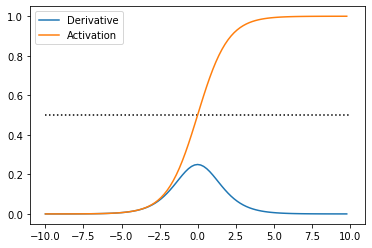

In [90]:
x = np.arange(-10, 10 , .2)
y = Sigmoid.activation(x)
dy = Sigmoid.derivative(x)

plt.hlines(.5, xmin=-10, xmax=10, colors='black', linestyles='dotted')
plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()
plt.show();

#### Tanh

The tanh is the evolution of the sigmoid function which squashes values between -1 and 1. Tanh acts almost identically to the sigmoid function, however the tanh activation function has a mean of 0. Still, tanh, just like the sigmoid, suffers from the saturation problem where values at -1 and 1 have a near zero derivative. Regardless, when choosing between the sigmoid and tanh there is almost no reason to ever go with the sigmoid!

The tanh activation function equation is given as follows:

$$
\begin{align}
g(z) &= \tanh(z) \\
&= \frac{e^z - e^{-z}}{e^z + e^{-z}}
\end{align}
$$

Further, the derivative of the tanh activation is given as follows:

$$
\begin{align}
g'(z) &=  1 - \tanh^2(z)
\end{align}
$$


In [91]:
class Tanh():
    @staticmethod
    def activation(z):
        return np.tanh(z)
    
    @staticmethod
    def derivative(z):
        return 1 - np.tanh(z)**2

Below is the plot containing the tanh activation function and the derivative of the tanh function for values between -10 and 10. 

Notice, as the tanh function (orange line) approaches -1 and 1 the derivative (blue line) goes to 0! Finally, note that the doted black line indicates the mean of the tanh function.

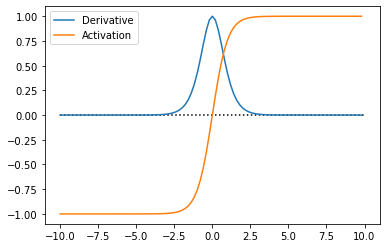

In [92]:
x = np.arange(-10, 10 , .2)
y = Tanh.activation(x)
dy = Tanh.derivative(x)

plt.hlines(0, xmin=-10, xmax=10, colors='black', linestyles='dotted')
plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()
plt.show();

#### Identity or linear

The last activation function is more of a placeholder activation function when you want to apply no activation function. The identity or linear activation function simply servers to act as if no activation was applied. To do so, we simply apply a linear or the identity transformation where the input is equal to the output.

The main take away here is that anytime you hear there is no activation function for a neuron then you can think of the neuron as having the identity/linear activation function.

In [93]:
class Linear():
    @staticmethod
    def activation(z):
        return z
    
    @staticmethod
    def derivative(z):
        return np.ones(z.shape)

Below is the plot containing the identity/linear activation function and the derivative of the identity/linear function for values between -10 and 10. 

Notice, that the identity/linear function is just a straight line where the x value is equal to the y value (i.e., input equals output). Further, notice that the derivative is always 1.

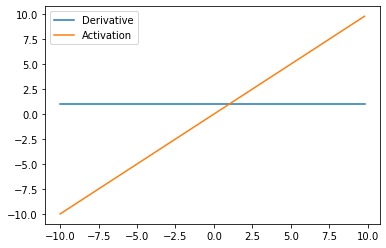

In [94]:
x = np.arange(-10, 10 , .2)
y = Linear.activation(x)
dy = Linear.derivative(x)

plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()

## Feed-forward Code


Finally, it's time to see how we can make a prediction using neural network. To do so, we'll compute each layers output starting from the input layer all the way to the output layer. Let's do so using the very basic two layer neural network given below. 

<img src="https://live.staticflickr.com/65535/51636259865_8edb486543.jpg" width="500" height="409" alt="single_layer_nn">

The goal will be to efficiently compute output of each layer. Recall, we can do so by computing the output for EVERY neuron in the layer at once by applying the following equations in order.

1. First we compute the 1st layer outputs by computing $\Am^{[1]}$. Here we'll use the sigmoid activation function for $g$.
$$
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}
$$

$$
\Am^{[1]} = g(\Zm^{[1]} )
$$

2. Next, we compute 2nd layer (i.e., output layer) SINGLE output by computing $\av^{[2]}$. Here we'll use the identity/linear activation function for $g$ as linear regression requires no activation for the output neuron.

$$
\zv^{[2]} = \wv^{[2]} \Am^{[1]} + \bv^{[2]}
$$

$$
\av^{[2]} = g(\zv^{[2]})
$$

3. Lastly, since the output of the 2nd layer is the output layer then the activations are the same as the predictions.

$$
\hat{\yv} = \av^{[2]\top} 
$$

### Toy Data

Below, the `nonlinear_data()` function defines some toy non-linear regression data that we'll use to test out the neural network implementation.


In [95]:
from sklearn.datasets import make_regression, make_friedman1

def nonlinear_data(m=100, n=3):
    X, _ = make_regression(
        n_samples=m, 
        n_features=n, 
        n_informative=1,
        noise=3.5,
        random_state=42,
    )
    rng = np.random.RandomState(42)
    X[:, 0] = np.sort(6 * rng.rand(m, 1) - 3, axis=0).reshape(m,)
    y = (2 + .5* X[:, 0]**2 + X[:, 0]) + rng.rand(m)

    return X, y.reshape(-1, 1)

Below we can see the shape of the data which has 100 data samples and 3 features.

In [96]:
X, y = nonlinear_data()

In [97]:
X.shape

(100, 3)

In [98]:
X

array([[-2.9668673 ,  0.34115197, -0.07710171],
       [-2.87649303,  1.16316375, -1.43586215],
       [-2.84748524, -0.16128571, -0.80227727],
       [-2.79366887, -1.23695071,  0.78182287],
       [-2.72863627, -0.33450124, -1.20029641],
       [-2.72129752,  0.06980208, -0.60021688],
       [-2.65149833,  2.13303337, -1.2378155 ],
       [-2.6186499 ,  1.46564877, -1.4123037 ],
       [-2.60969044, -1.91877122, -0.07444592],
       [-2.55573209,  0.17457781,  1.8861859 ],
       [-2.55269614, -1.07774478,  0.06428002],
       [-2.46904499,  0.75193303,  1.14282281],
       [-2.41396732,  0.09965137, -0.56629773],
       [-2.35265144,  0.18463386, -1.60748323],
       [-2.30478564,  0.91786195, -1.26088395],
       [-2.28243452, -1.15099358,  0.11092259],
       [-2.26777059,  1.35624003,  0.81252582],
       [-2.16303684,  0.62962884,  0.81286212],
       [-2.15445465,  0.06856297, -1.55066343],
       [-2.06403288,  3.85273149,  0.51504769],
       [-2.06388816, -0.51827022,  1.477

Below we can see the shape of the labels which has 100 target/labels.

In [99]:
y.shape

(100, 1)

In [100]:
y

array([[3.46571267],
       [3.89702347],
       [3.52095684],
       [3.6171947 ],
       [3.90165814],
       [3.23072481],
       [3.27410629],
       [3.56556489],
       [3.02434983],
       [2.78713108],
       [2.9951841 ],
       [2.74026788],
       [3.42934944],
       [3.22295334],
       [2.98463654],
       [3.19377974],
       [3.10729321],
       [2.3628974 ],
       [3.05894177],
       [2.60542522],
       [2.87336916],
       [2.8732144 ],
       [2.23118961],
       [2.01466766],
       [2.12476275],
       [2.26668052],
       [2.64420919],
       [2.68229834],
       [1.77046497],
       [2.11079494],
       [1.98656797],
       [1.77152927],
       [1.6517751 ],
       [1.86815231],
       [2.45814295],
       [1.83804957],
       [2.02778284],
       [2.21143436],
       [1.86482521],
       [2.47293495],
       [2.46255405],
       [1.76165523],
       [2.00861798],
       [1.82051419],
       [1.81540448],
       [1.59202011],
       [2.26931592],
       [2.177

Below is each feature of the toy data plotted against the target. Notice that we have 3 features. However, only the 1st feature has a non-linear trend with the target. This means, features 2 and 3 don't provide any information about predicting the target `y`.

Thus, even though our data has 3 features, there is only one informative feature which corresponds to feature 1. Our neural network will have to learn that feature 1 is the only informative feature and it will have to learn feature 1's non-linear mapping in order to predict the targets.

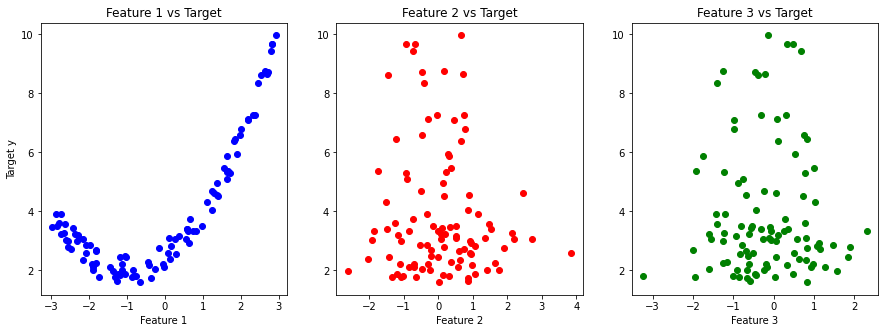

In [101]:
feature1 = X[:, 0]
feature2 = X[:, 1]
feature3 = X[:, 2]

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].plot(feature1, y, 'ob')
ax[0].set_title("Feature 1 vs Target")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Target y")

ax[1].plot(feature2, y,  'or')
ax[1].set_title("Feature 2 vs Target")
ax[1].set_xlabel("Feature 2")

ax[2].plot(feature3, y, 'og')
ax[2].set_title("Feature 3 vs Target")
ax[2].set_xlabel("Feature 3")

plt.show()

### Hidden Layer 1

Alright, the first step in computing the predictions for a neural network is compute the output of the first layer. In our case, this is the first and only hidden layer. Below is the image of the 1st hidden layer and the input layer. The input layer will provide the inputs that the hidden layer will use to compute its outputs.

<img src="https://live.staticflickr.com/65535/51636177013_f3088e6720.jpg" width="300" height="209" alt="signle_nn_hidden_layers">

*Note, the red arrow in the picture points in the direction information is flowing. In this case, information is flowing forwards.*

#### Initializing weights
Before we compute the 1st hidden layers outputs, we need to initialize the weights and bias for the 1st hidden layer. 

The shape of the weights must always be (neurons, inputs). In the case of the hidden layer weight $\Wm^{[1]}$, it's shape would be (hidden neurons=2, feature inputs=3) or (2, 3) as we have 2 hidden neurons and 3 feature inputs. We'll refer to the hidden layer's weights as `W1`.

We can initialize the weights to using a random uniform distribution that range between -0.5 and 0.5. Now there is a whole research field dedicated to researching the best ways to initialize weights. However, for now, we'll just use a naive method that keeps our weight values small, but not too small. This will help prevent issues like overflow/underflow when dealing with many hidden neurons. 

The shape of the bias is always (neurons, 1). In the case of the hidden layer bias $\bv^{[1]}$, it's shape would be (hidden neurons=2, 1) or (2,1) as we have 2 hidden neurons. Recall that a bias must be added to each neuron, therefore the bias is simply initialized as a vector of 1s. We'll refer to the hidden layer's bias as `b1`.

Below is the code for initializing the weights and biases.

In [102]:
rng = np.random.RandomState(0)

n_input_features = X.shape[1]
hidden_neurons = 2

W1 = rng.uniform(low=-0.5, high=0.5, size=(hidden_neurons, n_input_features))
b1 = np.ones([hidden_neurons, 1])

In [103]:
W1

array([[ 0.0488135 ,  0.21518937,  0.10276338],
       [ 0.04488318, -0.0763452 ,  0.14589411]])

Below are the shapes for the inputs $\Xm$ which corresponds to `X`, weights $\Wm^{[1]}$ which corresponds to `W1`, and bias $\bv^{[1]}$ which corresponds to `b1`.

In [104]:
print(f"Input data X shape: {X.shape}")
print(f"Hidden layer weights W1 shape: {W1.shape}")
print(f"Hidden layer bias b1 shape: {b1.shape}")

Input data X shape: (100, 3)
Hidden layer weights W1 shape: (2, 3)
Hidden layer bias b1 shape: (2, 1)


Notice anything wrong here with the input features? Recall, the input layer requires the input data to be of shape (features, data samples). Thus, we need to transpose our data to be a (features=3, data samples=100) instead of (data samples=100, features=3).

In [105]:
print(f"Input data X.T shape: {X.T.shape}")

Input data X.T shape: (3, 100)


#### Computing $\Zm^{[1]}$

The first component we must compute for each neuron is $\Zm^{[1]}$ which contains the linear combination of inputs for all the neurons in the 1st hidden layer. We can do so using the following equation:
$$
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}.
$$
where $\Zm^{[1]}$ has the shape (neurons=2, data samples=100).

Turning this into code looks like the below. Notice, input features `X` are transposed to be the correct shape of (features=3, data samples=100).

In [106]:
Z1 = W1 @ X.T + b1
print(f"{Z1.shape} =  {W1.shape} @ {X.T.shape} + {b1.shape}")
print(f"Continuous neuron outputs Z1 shape: {Z1.shape}")

(2, 100) =  (2, 3) @ (3, 100) + (2, 1)
Continuous neuron outputs Z1 shape: (2, 100)


Here, $\Zm^{[1]}$ corresponds to `Z1`. `Z1` is a matrix where the rows correspond to the neurons and the columns correspond to the linear combination (i.e. continuous output) for each data sample. Indexing the first row of `Z1` provides us with the linear combinations for the 1st hidden neuron in 1st hidden layer.

In [107]:
Z1[0]

array([0.92066586, 0.96233472, 0.74385258, 0.67779535, 0.67147808,
       0.82050429, 1.20237508, 1.04243346, 0.45206239, 1.10664388,
       0.65008037, 1.15872559, 0.84541504, 0.75969968, 0.95543678,
       0.65230357, 1.2646485 , 1.11343648, 0.75023613, 1.78124221,
       0.93960153, 0.7537088 , 0.64966211, 1.22004385, 0.82281065,
       1.13401029, 0.97382298, 0.6605198 , 0.5972205 , 0.90726036,
       0.53007925, 0.80030553, 1.0611152 , 0.73145994, 0.64301503,
       0.92568861, 1.153055  , 0.89332062, 1.12894418, 0.84006617,
       1.13791514, 0.47085194, 0.88410112, 0.92440066, 0.40973428,
       1.0551977 , 0.93831469, 1.22403667, 1.09789898, 0.71985089,
       1.48450964, 0.8736898 , 1.10958907, 1.14959155, 1.10275473,
       0.63601252, 1.34531569, 1.54417505, 1.13665277, 1.03240297,
       1.58522092, 0.6795684 , 1.39700254, 1.05754195, 1.35348344,
       0.90915588, 0.84640653, 0.87633449, 1.10360944, 0.83310571,
       0.93180324, 1.19934304, 1.59870832, 1.18945045, 1.00949

Indexing the second row of `Z1` provides us with the linear combinations for the 2nd hidden neuron in 1st hidden layer.

In [108]:
Z1[1]

array([0.82954355, 0.57260803, 0.76746166, 1.08310985, 0.7279515 ,
       0.78496234, 0.53755546, 0.56452461, 1.01849654, 1.14714585,
       0.97708559, 0.99850604, 0.80142605, 0.64578727, 0.64252398,
       1.00161286, 0.91321555, 0.97343868, 0.6718341 , 0.6883645 ,
       1.16254961, 0.82158825, 0.97169256, 0.68464027, 1.11507011,
       0.61145747, 0.77340692, 0.64591871, 0.87923644, 1.17390171,
       1.36670176, 0.99740108, 0.7929303 , 1.10410448, 1.06590727,
       0.87320135, 0.70932682, 1.14421195, 0.80501133, 0.87800256,
       1.22572792, 0.7769201 , 0.94559858, 0.79225399, 0.57153902,
       1.08970943, 0.78641888, 0.95552405, 0.82225318, 0.78891367,
       0.9676402 , 0.93296893, 0.9316414 , 0.86074336, 0.95011157,
       1.2532169 , 1.08422496, 0.92988624, 0.81929717, 0.84035827,
       0.77860343, 1.09531318, 0.96187242, 1.06492622, 1.12180062,
       1.12741673, 1.0872274 , 1.5172959 , 0.9272927 , 1.316241  ,
       1.05821123, 0.92550792, 0.87815715, 0.89189986, 0.92114

#### Computing $\Am^{[1]}$

Next, we need to apply the activation function to the linear combination outputs $\Zm^{[1]}$ for each neuron. Doing so will give us the neuron outputs $\Am^{[1]}$ for the 1st hidden layer. For now, we are just going to use the sigmoid activation function.

$$
\Am^{[1]} = g(\Zm^{[1]})
$$

We can simply get $\Am^{[1]}$  by calling the `Sigmoid.activation()` method. As `Sigmoid.activation()` is a static method, this means we DO NOT have to initialize the `Sigmoid` class in order to call the `activation()` static method!

Below is the code for applying the sigmoid activation function to `Z1`.

In [109]:
A1 = Sigmoid.activation(Z1)
print(f"Activation neuron outputs A1 shape: {A1.shape}")

Activation neuron outputs A1 shape: (2, 100)


Here, 1st layer activations $\Am^{[1]}$ corresponds to `A1`. `A1` is a matrix where the rows correspond to the neurons and the columns correspond to the activations for each data sample. Indexing the first row of `A1` provides us with the activation outputs for the 1st hidden neuron in 1st hidden layer.

In [110]:
A1[0]

array([0.71517776, 0.72358901, 0.67783773, 0.66324647, 0.66183405,
       0.69434338, 0.76894703, 0.73931927, 0.61112947, 0.7515029 ,
       0.65702857, 0.76110107, 0.69960446, 0.68128853, 0.72220724,
       0.65752938, 0.77982528, 0.75276922, 0.67923015, 0.85585019,
       0.71901916, 0.67998629, 0.65693431, 0.77207127, 0.69483264,
       0.75657822, 0.72588084, 0.65937715, 0.64502014, 0.71243922,
       0.62950159, 0.69003983, 0.7429036 , 0.67512556, 0.65543469,
       0.71619978, 0.76006848, 0.70957496, 0.755644  , 0.69847915,
       0.75729665, 0.61558538, 0.70767135, 0.71593792, 0.60102416,
       0.74177175, 0.71875911, 0.77277315, 0.74986623, 0.67257418,
       0.81525277, 0.70551289, 0.75205249, 0.7594363 , 0.7507759 ,
       0.65385153, 0.79336275, 0.82407083, 0.75706455, 0.7373815 ,
       0.82994266, 0.66364236, 0.80170781, 0.74222053, 0.79469854,
       0.7128274 , 0.69981279, 0.70606206, 0.75093579, 0.69701122,
       0.71744098, 0.76840789, 0.83183778, 0.76664276, 0.73292

Indexing the second row of `A1` provides us with the activation outputs for the 2nd hidden neuron in 1st hidden layer.

In [111]:
A1[1]

array([0.69625841, 0.63936475, 0.68297154, 0.74708204, 0.67435558,
       0.68674863, 0.63124357, 0.6374988 , 0.73467964, 0.75898921,
       0.72652955, 0.73076475, 0.69027945, 0.65606051, 0.65532379,
       0.73137557, 0.71365771, 0.72580437, 0.66191372, 0.665603  ,
       0.76179568, 0.69457338, 0.72545673, 0.66477357, 0.75307313,
       0.6482732 , 0.68425742, 0.65609017, 0.70666397, 0.76384954,
       0.79684675, 0.73054729, 0.68846018, 0.75102837, 0.74381781,
       0.7054114 , 0.67025239, 0.75845212, 0.69104543, 0.70640813,
       0.77306999, 0.68501594, 0.72022916, 0.6883151 , 0.63911822,
       0.748327  , 0.68706188, 0.72222475, 0.69471442, 0.68759803,
       0.72464889, 0.71767723, 0.71740817, 0.70281594, 0.72113762,
       0.77785623, 0.74729268, 0.7170522 , 0.69408713, 0.69854067,
       0.68537904, 0.74938091, 0.72349654, 0.74363083, 0.75432256,
       0.75536185, 0.74785926, 0.82013994, 0.71652571, 0.78855563,
       0.74234856, 0.71616305, 0.70644019, 0.70928208, 0.71527

### Output Layer

The final step in computing the predictions for a neural network is to compute the output of the 2nd layer (i.e., output layer). Below is the image of the 1st hidden layer and the output layer. The 1st hidden layer will provide the inputs that the output layer will use to compute its SINGLE output per data sample.

<img src="https://live.staticflickr.com/65535/51636813390_2a66fa526a.jpg" width="300" height="239" alt="signle_nn_output_layer">

*Note, the red arrow in the picture points in the direction information is flowing. In this case, information is flowing forwards.*

#### Initializing weights

Before we compute the output layer output, we need to initialize the weights and biases for the layer. 

The shape of the weights must always be (neurons, inputs). In the case of the output layer weights $\wv^{[2]}$, it's would be (output neurons=1, hidden neuron inputs=2) or (1, 2) as we have 1 output neuron and 2 hidden neurons from the 1st hidden layer acting as inputs. We can initialize the weights to random numbers for now. We'll refer to the output layer's weights as `W2`.

The shape of the bias is always (neurons, 1). In the case of the output layer bias $\bv^{[2]}$, it's shape would be (output neurons=1, 1) or (1,1) as we have 1 output neuron. Recall that a bias must be added to each neuron, therefore the bias simply initialized as a vector of 1s. We'll refer to the output layer's bias as `b2`.

Below is the code for initializing the weights and biases.

In [112]:
output_neurons = 1

W2 = rng.uniform(low=-0.5, high=0.5, size=(output_neurons, hidden_neurons))
b2 = np.ones([output_neurons, 1])

In [113]:
W2

array([[-0.06241279,  0.391773  ]])

Below are the shapes for the inputs $\Am^{[1]}$ which corresponds to `A1`, weights $\wv^{[2]}$ which corresponds to `W2`, and bias $\bv^{[2]}$ which corresponds to `b2`.

In [114]:
print(f"Input activations A1 shape: {A1.shape}")
print(f"Output layer weights shape: {W2.shape}")
print(f"Output layer bias shape: {b2.shape}")

Input activations A1 shape: (2, 100)
Output layer weights shape: (1, 2)
Output layer bias shape: (1, 1)


#### Computing $\zv^{[2]}$

Like always, we first compute have to compute are the linear combinations $\zv^{[2]}$ for each neuron in the output layer using the outputs from the previous layer's neurons $\Am^{[1]}$. To do so, we use the following equation:
$$
\zv^{[2]} = \wv^{[2]} \Am^{[1]} + \bv^{[2]}
$$
where $\zv^{[2]}$ s a vector as there is only 1 output neuron and $z$ always has the shape (neurons, data samples).

This equation turned into code is given below.

In [115]:
Z2 = W2 @ A1 + b2
print(f"{Z2.shape} =  {W2.shape} @ {A1.shape} + {b2.shape}")
print(f"Continuous neuron outputs Z2 shape: {Z2.shape}")

(1, 100) =  (1, 2) @ (2, 100) + (1, 1)
Continuous neuron outputs Z2 shape: (1, 100)


Here, $\zv^{[2]}$ corresponds to `Z2`. `Z2` is a vector where the row correspond to the neuron and the columns correspond to the linear combination for each data sample. Indexing the first row of `Z2` provides us with the linear combinations for the only neuron in output layer.

In [116]:
Z2[0]

array([1.22813901, 1.20532464, 1.22526407, 1.25129151, 1.2228874 ,
       1.22571366, 1.19931206, 1.20361184, 1.24968535, 1.25044809,
       1.24362768, 1.23879146, 1.22676858, 1.21450568, 1.2116632 ,
       1.24549496, 1.23092075, 1.23736813, 1.21692728, 1.20734929,
       1.25357499, 1.22967526, 1.24321326, 1.21225322, 1.25166728,
       1.20675578, 1.22276933, 1.21588485, 1.23659436, 1.25479031,
       1.27289409, 1.2431414 , 1.22335342, 1.25209617, 1.25050023,
       1.23166111, 1.2151488 , 1.25285451, 1.22357109, 1.2331576 ,
       1.25560295, 1.22995035, 1.2379986 , 1.22497959, 1.21287767,
       1.24687827, 1.22431253, 1.23471723, 1.22536911, 1.22740511,
       1.23301567, 1.23713353, 1.23412346, 1.22794577, 1.23566423,
       1.26393437, 1.24325312, 1.22948914, 1.22467409, 1.22764734,
       1.21671397, 1.25216744, 1.23340959, 1.24501043, 1.24592386,
       1.25144083, 1.2493138 , 1.27724138, 1.23384743, 1.26543239,
       1.24605463, 1.23261487, 1.22484688, 1.23002926, 1.23448

#### Computing $\av^{[2]}$

Next, we need to apply the activation function to the linear combination outputs $\zv^{[2]}$ for each neuron. Doing so will give us the neuron outputs $\av^{[2]}$ for the output layer.  For now, we are just going to use the identity/linear activation function.

$$
\av^{[2]} = g(\zv^{[2]})
$$

As we are performing regression no activation function is used for the output neurons. This is because we want the network to predict any continuous values between negative infinity and positive infinity. However, we can simply apply the identity or linear activation which returns the input as output giving off the guise that no activation function was applied! 

Below is the code for applying the linear activation function to `Z2`.

In [117]:
A2 = Linear.activation(Z2)
print(f"Activation neuron outputs A2 shape: {A2.shape}")

Activation neuron outputs A2 shape: (1, 100)


Here, the output layer activation $\av^{[2]}$ corresponds to `A1`. `A1` is a matrix where the rows correspond to the output neuron and the columns correspond to the activations for each data sample. Indexing the first row of `A1` provides us with the activation outputs for the only output neuron.

In [118]:
A2[0]

array([1.22813901, 1.20532464, 1.22526407, 1.25129151, 1.2228874 ,
       1.22571366, 1.19931206, 1.20361184, 1.24968535, 1.25044809,
       1.24362768, 1.23879146, 1.22676858, 1.21450568, 1.2116632 ,
       1.24549496, 1.23092075, 1.23736813, 1.21692728, 1.20734929,
       1.25357499, 1.22967526, 1.24321326, 1.21225322, 1.25166728,
       1.20675578, 1.22276933, 1.21588485, 1.23659436, 1.25479031,
       1.27289409, 1.2431414 , 1.22335342, 1.25209617, 1.25050023,
       1.23166111, 1.2151488 , 1.25285451, 1.22357109, 1.2331576 ,
       1.25560295, 1.22995035, 1.2379986 , 1.22497959, 1.21287767,
       1.24687827, 1.22431253, 1.23471723, 1.22536911, 1.22740511,
       1.23301567, 1.23713353, 1.23412346, 1.22794577, 1.23566423,
       1.26393437, 1.24325312, 1.22948914, 1.22467409, 1.22764734,
       1.21671397, 1.25216744, 1.23340959, 1.24501043, 1.24592386,
       1.25144083, 1.2493138 , 1.27724138, 1.23384743, 1.26543239,
       1.24605463, 1.23261487, 1.22484688, 1.23002926, 1.23448

Also notice `A2` is equal to `Z2` as the linear function simply returns whatever the input is as the output.

In [119]:
np.all(A2 == Z2)

True

Finally, we can say that `A2` contains the predictions made by the neural network. We can therefore say $\hat{\yv} = \av^{[2]\top}$. Notice, we need to transpose the predictions to get them to match the shape of the ground truth `y` which has the shape (data samples, 1).

In [120]:
y_hat = A2.T
y_hat

array([[1.22813901],
       [1.20532464],
       [1.22526407],
       [1.25129151],
       [1.2228874 ],
       [1.22571366],
       [1.19931206],
       [1.20361184],
       [1.24968535],
       [1.25044809],
       [1.24362768],
       [1.23879146],
       [1.22676858],
       [1.21450568],
       [1.2116632 ],
       [1.24549496],
       [1.23092075],
       [1.23736813],
       [1.21692728],
       [1.20734929],
       [1.25357499],
       [1.22967526],
       [1.24321326],
       [1.21225322],
       [1.25166728],
       [1.20675578],
       [1.22276933],
       [1.21588485],
       [1.23659436],
       [1.25479031],
       [1.27289409],
       [1.2431414 ],
       [1.22335342],
       [1.25209617],
       [1.25050023],
       [1.23166111],
       [1.2151488 ],
       [1.25285451],
       [1.22357109],
       [1.2331576 ],
       [1.25560295],
       [1.22995035],
       [1.2379986 ],
       [1.22497959],
       [1.21287767],
       [1.24687827],
       [1.22431253],
       [1.234

### Putting it all together

We can put all the code together by putting the weight and bias initializations into a function called `init_weights()` and the forward pass code into a function called `forward()`.

The `init_weights()` function will simply initialize the weights and biases for each layer for us and return them in a `weights` dictionary and a `bias` dictionary. 

**Inputs**: The `init_weights()` function takes in the following:
- `n_input_features` number of input features
- `hidden_neurons` the number of hidden neurons or units to use in the 1st hidden layer
- `output_neurons` the number of output neurons to use in the output layer .

**Outputs**: Returns the weights and biases for each layer which are formated as dictionaries.

In [121]:
def init_weights(n_input_features, hidden_neurons, output_neurons, seed=0):
    weights = {}
    bias = {}
    
    rng = np.random.RandomState(seed)
    weights['W1'] = rng.uniform(low=-0.5, high=0.5, size=(hidden_neurons, n_input_features))
    weights['W2'] = rng.uniform(low=-0.5, high=0.5, size=(output_neurons, hidden_neurons))

    
    bias['b1'] = np.ones([hidden_neurons, 1])
    bias['b2'] = np.ones([output_neurons, 1])
    
    return weights, bias


The `forward()` function compute the outputs for each layer and then returns the predictions of the neural network. Notice, we store the transposed feature inputs `X.T` into `As['A0']`. For generalization purposes, feature inputs $\Xm$ are often also denoted as $\Am^{[0]}$.

**Inputs**: The `forward()` function also takes in following:

- `X` which corresponds to the input features
- `weights` which corresponds to the `weights` dictionary
- `bias` which corresponds to the `bias` dictionary

**Outputs**: Returns predictions `y_hat` as a NumPy array along with the linear combinations for each layer $\Zm$ as the dictionary `Zs` and activations for each layer $\Am$ as the dictionary `As`. 



In [122]:
def forward(X, weights, bias):
    Zs = {}
    As = {}
    
    As['A0'] = X.T
    # Forward pass
    Zs['Z1'] = weights['W1'] @ As['A0'] + bias['b1']
    As['A1'] = Sigmoid.activation(Zs['Z1'])
    Zs['Z2'] = weights['W2'] @ As['A1'] + bias['b2']
    As['A2'] = Linear.activation(Zs['Z2'])
    
    y_hat = As['A2'].T
    return y_hat, Zs, As

Below we call the `init_weights()` function passing the number of features, 2 hidden neurons, and 1 output neuron to replicate the structure our neural network. Further, we call the `forward()` function passing the data, weights, and biases.

In [123]:
weights, bias = init_weights(
    n_input_features=X.shape[1],
    hidden_neurons=2,
    output_neurons=1
)

y_hat, Zs, As = forward(X, weights=weights, bias=bias)

As we are looking at a non-linear regression problem, we also define the mean squared error (MSE) loss function and sum of square errors (SSE) cost function below. Recall, we'll need a cost/loss function to assess the performance of the network and for gradient descent to update the weights (see next section).

In [124]:
def reshape_labels(y):
    if len(y.shape) != 2:
        y = y.reshape(-1, 1)
    return y

def sse(y, y_hat):
    y = reshape_labels(y)
    y_hat = reshape_labels(y_hat)
    
    sqrd_err = (y_hat - y)**2
    
    return np.sum(sqrd_err)

def mse(y, y_hat):
    y = reshape_labels(y)
    y_hat = reshape_labels(y_hat)
    
    sqrd_err = (y_hat - y)**2
    
    return np.mean(sqrd_err)

Below, you can see the output for the the SSE, MSE, `y_hat`, `weights`, `bias`, `Zs`, and `As`. 

In [125]:
sse(y, y_hat)

1183.8792691026304

In [126]:
mse(y, y_hat)

11.838792691026304

In [127]:
y_hat.shape

(100, 1)

In [128]:
weights

{'W1': array([[ 0.0488135 ,  0.21518937,  0.10276338],
        [ 0.04488318, -0.0763452 ,  0.14589411]]),
 'W2': array([[-0.06241279,  0.391773  ]])}

In [129]:
bias

{'b1': array([[1.],
        [1.]]),
 'b2': array([[1.]])}

In [130]:
Zs

{'Z1': array([[0.92066586, 0.96233472, 0.74385258, 0.67779535, 0.67147808,
         0.82050429, 1.20237508, 1.04243346, 0.45206239, 1.10664388,
         0.65008037, 1.15872559, 0.84541504, 0.75969968, 0.95543678,
         0.65230357, 1.2646485 , 1.11343648, 0.75023613, 1.78124221,
         0.93960153, 0.7537088 , 0.64966211, 1.22004385, 0.82281065,
         1.13401029, 0.97382298, 0.6605198 , 0.5972205 , 0.90726036,
         0.53007925, 0.80030553, 1.0611152 , 0.73145994, 0.64301503,
         0.92568861, 1.153055  , 0.89332062, 1.12894418, 0.84006617,
         1.13791514, 0.47085194, 0.88410112, 0.92440066, 0.40973428,
         1.0551977 , 0.93831469, 1.22403667, 1.09789898, 0.71985089,
         1.48450964, 0.8736898 , 1.10958907, 1.14959155, 1.10275473,
         0.63601252, 1.34531569, 1.54417505, 1.13665277, 1.03240297,
         1.58522092, 0.6795684 , 1.39700254, 1.05754195, 1.35348344,
         0.90915588, 0.84640653, 0.87633449, 1.10360944, 0.83310571,
         0.93180324, 1.19934

In [131]:
As

{'A0': array([[-2.9668673 , -2.87649303, -2.84748524, -2.79366887, -2.72863627,
         -2.72129752, -2.65149833, -2.6186499 , -2.60969044, -2.55573209,
         -2.55269614, -2.46904499, -2.41396732, -2.35265144, -2.30478564,
         -2.28243452, -2.26777059, -2.16303684, -2.15445465, -2.06403288,
         -2.06388816, -1.97685526, -1.9090502 , -1.89957294, -1.89087327,
         -1.82410283, -1.80770591, -1.80195731, -1.72596534, -1.44732011,
         -1.37190581, -1.31439294, -1.25262516, -1.24713211, -1.17454654,
         -1.17231738, -1.13410607, -1.12973354, -1.04890007, -1.04801802,
         -1.01461185, -0.85948004, -0.84920563, -0.80182894, -0.75275929,
         -0.66793626, -0.43475389, -0.40832989, -0.35908504, -0.26358009,
         -0.16671045, -0.03722642, -0.02893854,  0.08540663,  0.12040813,
          0.13639698,  0.14853859,  0.2561765 ,  0.28026168,  0.36766319,
          0.55448741,  0.58739987,  0.59195091,  0.60669007,  0.64526911,
          0.67111737,  0.7397887

#  Feedback: Learning Weights with Backpropagation

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width=500 height=500>

Now the question is, given the predictions predictions made by the forward pass, how can we compute the gradients to then learn best weights and biases for the given data? Well, you might have seen this coming, the answer is gradient descent.

However, remember that neural networks have multiple parameters where each layer has its own weights and biases. This means the hidden layer has its own weights and biases and the output layer has its own weights and biases. With a two layer neural network we then have four sets of weights and biases to learn. So, how do we update multiple weights and biases? Further, how do we update weights and biases whose values influence each other? Recall, later layers, like the output layer, are influenced by earlier layers. This means, changes in the weights in the hidden layer will influence the output in the output layer! 

What if we just tried updating each weight and bias one at a time while treating the other weights and biases as constants? Well, this is the general idea of *backpropagation*, a method for computing the gradients with respect to each set of weights and bias in the network.

The goal of backpropogration is to compute the gradient of each layer's weights and biases one at a time. However, instead of starting at the 1st layer we start at the last layer and we backpropogate the error/loss (i.e., the parent or root equation) through the network. When we say " backpropogate the error/loss through the network" all this means is we compute the gradient starting with the loss function and then we continue to compute the gradient of subsequent equations until we reach our desired weight or bias parameter. In order to do this, we need to utilize and understand the concept of partial derivatives and the chain rule from calculus.



## Partial derivatives with Chain Rule
If you are unfamiliar with partial derivatives and the Chain Rule it is highly recommended you check out [this video](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/multivariable-chain-rule/v/multivariable-chain-rule) or [post](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/differentiating-vector-valued-functions/a/multivariable-chain-rule-simple-version). With this in mind, we will quickly review the concept by using a simple example.

The goal of computing partial derivatives with the Chain Rule is to compute the derivatives for an equation with multiple variables and multiple equations or sub-functions. [Partial derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives) refer to computing the derivatives for two or more variables in an equation. The [Chain Rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review) refers to computing the derivative of equations within equations such as $h'(x) = f'(g(x))g'(x)$. As we will soon see, neural networks are just a combination many equations with different variables nested inside one another (i.e., there are many variables and many small equations that make up neural networks).

Let's look at a very basic example. Given the equations below, the goal will be to compute the derivative of the "parent" or root equation $f(x, y)$ with respect to the variable $s$. However, notice $s$ is nested in the variable $t$ and $t$ is nested in the variable $x$.
$$
f(x, y) = x^2 y \\
x = t^3 \\
t = \log(s)
$$
If we wrote out the entire equation plugging in each variable we would get the following:
$$
f(x, y) = (\log(s)^3)^2 y 
$$
Notice, when framed this way, this is just a matter of computing the derivative of $s$. However, computing that derivative directly is a small nightmare. It would be much easier if we computed the derivative in smaller parts. This is the exact idea of the computing partial derivative with the Chain Rule.

Let's solve this problem. Our goal is to then compute the derivative $s$ which can be written in partial derivative notation as $\frac{\partial f(x, y)}{\partial s}$ where $\partial$ indicates the partial derivative (i.e., the derivative for a single variable). Notation wise, the variable we want to find, $s$ in this case, goes in the denominator and the equation the variable is nested inside, $f(x, y)$ in this case, goes in the numerator.

Now we can solve for $\frac{\partial f(x, y)}{\partial s}$ by holding each variable constant and solving for the derivative of each equation one at a time. The expanded form is given as follows: 

$$
\frac{\partial f(x, y)}{\partial s} = \frac{\partial f(x, y)}{\partial x}\frac{\partial x}{\partial t}\frac{\partial t}{\partial s}.
$$

Notice, the first derivative we most compute is  $\frac{\partial f(x, y)}{\partial x}$. This says, treat all other variables as a constant (in this case we would treat $y$ as a constant as it is the only other variable) and solve for $x$. We solve for $x$ because $s$ is nested within $x$. The next derivative we have to compute is $\frac{\partial x}{\partial t}$. Once again, we need to compute the derivative of $x$'s equation with respect to $t$ because $s$ is nested in $t$. Finally, $\frac{\partial t}{\partial s}$ computes the derivative of $t$'s equation with respect to $s$. Now, all we do is multiply all the solutions together and that gives us the derivative of $\frac{\partial f(x, y)}{\partial s}$.

Computing the derivative for each partial equation looks as follows:
$$
\frac{\partial f(x, y)}{\partial x} = 2x \\
\frac{\partial x}{\partial t} = 3t^2 \\
\frac{\partial t}{\partial s} = \frac{1}{s}
$$
Combining all the partial derivatives gives us the following solution:

$$
\begin{align}
\frac{\partial f(x, y)}{\partial s} &= \frac{\partial f(x, y)}{\partial x}\frac{\partial x}{\partial t}\frac{\partial t}{\partial s} \\
&=  (2x)(3t^2)(\frac{1}{s})
\end{align}
$$
where we simply plugged the partial derivatives solutions back into the original expanded equation.

Now, all we have to do is take this idea and apply it to computing the derivatives/gradients of our parameters for our neural network and then apply the gradient descent updates!

## Backpropagation 

Recall, we can write out all the equations for our two layer neural network including the loss as follows:


1. Hidden layer (layer 1) equations

$$
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}
$$

$$
\Am^{[1]} = g(\Zm^{[1]} )
$$

2. Output layer (layer 2) equations

$$
\zv^{[2]} = \wv^{[2]} \Am^{[1]} + \bv^{[2]}
$$

$$
\av^{[2]} = g(\zv^{[2]})
$$



3. MSE loss
$$
\hat{\yv} = \av^{[2]\top}
$$

$$
MSE = \frac{1}{2m} (\hat{\yv} - {\yv})^2 
$$
 
Thus, we need to compute the gradients or partial derivatives with respect to $\Wm^{[1]}$, $\bv^{[1]}$, $\wv^{[2]}$, and $\bv^{[2]}$ using all of the above equations. 

As this is a non-regression problem, we'll use the mean squared error (MSE) loss to measure the performance of the network and compute the gradients. Remember the negative gradient corresponds to how we need to change the weights such that the value of the loss decreases or is minimized! Thus, the MSE loss will be the "parent" equation we use to compute the gradients with. 

Remember we will need to compute the gradients with respect to each of the previously mentioned weights and biases. This means we need to solve for $\frac{\partial MSE}{\partial  \Wm^{[1]}}$, $\frac{\partial MSE}{\partial \bv^{[1]}}$,  $\frac{\partial MSE}{\partial \wv^{[2]}}$, and $\frac{\partial MSE}{\partial \bv^{[2]}}$.

Before we start, we define `delta_mse` which is the derivative of the MSE the loss function $MSE = \frac{1}{2m}(\hat{y} - y)^2$ where we remove the $\frac{1}{m}$ for convenience sake.

In [132]:
def delta_mse(y, y_hat):
    return y_hat - y

### Output Layer

To start computing gradients, we first compute the derivative of the parent function, the MSE loss, and then slowly compute the derivatives of each equation up until we reach the desired weight and bias parameter. The first parameters we will run into are the weights and biases for the output layer. Thus, we'll compute the partial derivatives $\frac{\partial MSE}{\partial \wv^{[2]}}$ and $\frac{\partial MSE}{\partial \bv^{[2]}}$ first as they are the first parameters we run into when propagating backwards through the network.

To compute gradients for $\frac{\partial MSE}{\partial \wv^{[2]}}$ and $\frac{\partial MSE}{\partial \bv^{[2]}}$ we'll only need information regarding the loss, output layer, and hidden layer outputs $\Am^{[1]}$. Visually, this looks like the below image where we are backpropagating through the network up to the end of the output layer.

<img src="https://live.staticflickr.com/65535/51635129152_217a68e8d4.jpg" width="300" height="246" alt="signle_nn_output_layers_back">

#### Weight update

To compute the gradient or partial derivative of the  weights $\wv^{[2]}$ we need the following equations:

$$
\begin{align}
MSE &= \frac{1}{2m} (\av^{[2]\top} - {\yv})^2  \\ 
 \\
\av^{[2]} &= g(\zv^{[2]}) \\
\\
\zv^{[2]} &= \wv^{[2]} \Am^{[1]} + \bv^{[2]}
\end{align}
$$
where $\hat{\yv} = \av^{[2]\top}$.

Thus, if we expand $\frac{\partial MSE}{\partial \wv^{[2]}}$ we get the following equation:
$$
\frac{\partial MSE}{\partial \wv^{[2]}} = \frac{\partial MSE}{\partial \av^{[2]}}\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\frac{\partial \zv^{[2]} }{\partial  \wv^{[2]} }
$$

If we compute the derivative of each of the partial derivatives we get the following:

$$
\begin{align}
\frac{\partial MSE}{\partial \av^{[2]}} &= (\av^{[2]\top} - {\yv}) \\
\frac{\partial \av^{[2]}}{\partial \zv^{[2]} } &= \mathbf{1} \\
\frac{\partial \zv^{[2]} }{\partial  \wv^{[2]} } &= \Am^{[1]}
\end{align}
$$

Heres a short description of what we did to find each of the partial derivatives.
1. Computing $\frac{\partial MSE}{\partial \av^{[2]}}$ simply requires taking the derivative of the MSE loss function. Recall, for regression problems, the output of the output layer is equal to the predictions such that $\hat{\yv} = \av^{[2]\top}$ is true.
2. Computing $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ gives us matrix or vector of 1s because we set $g$ as the identity/linear activation in the output neuron. Recall, this means the input is equal to the output. Thus, the derivative for each data sample is simply 1. The shape of $\mathbf{1}$ is the same as $\zv$.
3. Computing $\frac{\partial \zv^{[2]} }{\partial  \wv^{[2]} }$ simply requires taking derivative of the linear combination equation $\wv^{[2]} \Am^{[1]} + \bv^{[2]}$ where $\wv^{[2]}$ goes away and $\bv^{[2]}$ goes to zero as it is treated as constant and does not depend on $\wv^{[2]}$. This leaves only the activation outputs $\Am^{[1]}$ from the hidden layer. 

Turning all this into code looks as follows. Below are the weights before updating the network.

In [133]:
print(f"weights['W2'] shape: {weights['W2'].shape}")
weights['W2']

weights['W2'] shape: (1, 2)


array([[-0.06241279,  0.391773  ]])

Next, we set each of the partial derivatives equal to their derivative where
- $\frac{\partial MSE}{\partial \av^{[2]}}$ corresponds to  `delta_mse_A2` 
- $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ corresponds to `delta_A2_Z2`
- $\frac{\partial \zv^{[2]} }{\partial \wv^{[2]} }$ corresponds to `delta_Z2_W2` 

Below is a short description of what we did to find each of the partial derivatives.

```Python
delta_mse_A2 = delta_mse(y, y_hat)
```
To compute the partial derivative $\frac{\partial MSE}{\partial \av^{[2]}}$ we use the `delta_mse()` which is the derivative of the MSE where we remove the $\frac{1}{m}$ for convenience sake. 

```Python
delta_A2_Z2 = Linear.derivative(Zs['Z2'])
```
To compute the partial derivative $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ we can call the static method `Linear.derivative()` and pass `Z2` which will return a NumPy array of ones whose shape is the same as `Z2` which is (neurons=1, data samples=100).

```Python
delta_Z2_W2 = As['A1']
```
Lastly, the partial derivative for $\frac{\partial \zv^{[2]} }{\partial  \wv^{[2]} }$ is simply set to `As['A1']` which corresponds to activation outputs from the hidden layer $\Am^{[1]}$.



In [134]:
delta_mse_A2 = delta_mse(y, y_hat)
delta_A2_Z2 = Linear.derivative(Zs['Z2'])
delta_Z2_W2 = As['A1']

Below are the shapes of each of the partial derivatives, the labels, and predictions.

In [135]:
print(f"y shape: {y.shape}")
print(f"y_hat shape: {y_hat.shape}")
print(f"delta_mse_A2 shape: {delta_mse_A2.shape}")
print(f"delta_A2_Z2 shape: {delta_A2_Z2.shape}")
print(f"delta_Z2_W2 shape: {delta_Z2_W2.shape}")

y shape: (100, 1)
y_hat shape: (100, 1)
delta_mse_A2 shape: (100, 1)
delta_A2_Z2 shape: (1, 100)
delta_Z2_W2 shape: (2, 100)


Sadly, we can't always compute $\frac{\partial MSE}{\partial \wv^{[2]}}$ by simply multiplying all the values for the expanded partial derivative equation. Since we are working with vectors and matrices we need to utilize the dot product and, in turn, rearrange some of the partial derivatives. 

$$
\begin{align}
\frac{\partial MSE}{\partial \wv^{[2]}} &=  \frac{\partial MSE}{\partial \av^{[2]}} \frac{\partial \av^{[2]}}{\partial \zv^{[2]} } \frac{\partial \zv^{[2]}}{\partial  \wv^{[2]}}\\
\\
&=  \big (\frac{\partial MSE}{\partial \av^{[2]}}^\top * \frac{\partial \av^{[2]}}{\partial \zv^{[2]} } \big ) \cdot \frac{\partial \zv^{[2]}}{\partial  \wv^{[2]}}^\top  \\
\\
&= \big( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big )  \cdot  \Am^{[1]\top}
\end{align}
$$

where $\cdot$ represents the dot product and $*$ represents element-wise multiplication. Notice, that the equation inherently computes the sum of the gradients due to the addition of the dot product. This means we only need to divide by the number of data samples used to compute the gradient to get the average gradient.

Further, we need to add some transposes to make the equation function properly. If we don't do this, shape mismatch errors will be thrown.

- First, we have to transpose $\frac{\partial MSE}{\partial \av^{[2]}}^\top$ (i.e., `delta_mse_A2`). This allows us to take the element-wise product $*$ with the partial derivative of the activation function $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ (i.e., `delta_A2_Z2`) which has the shape (1, data samples=100).
    - Original shape: (data samples=100, 1) 
    - Transposed shape: (1, data samples=100) 

- Second, we have to transpose $\frac{\partial \zv^{[2]}}{\partial  \wv^{[2]}}^\top$  (i.e., ``delta_Z2_W2``) because its shape ()to get the shape (data samples, neurons) so that when we take the dot product with $\big( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big )$ which has shape (1 , data samples=100).
    - Original shape: (input=2, data samples=100) 
    - Transposed shape: (data samples=100, input=2) 

In [136]:
# Gradient
delta_mse_W2 = (delta_mse_A2.T * delta_A2_Z2) @ delta_Z2_W2.T
# Average Gradient
W2_avg_grad = delta_mse_W2 / len(y)
W2_avg_grad

array([[-1.96239859, -1.95823307]])

Below are the shapes of the variables used in the equation.

In [137]:
print(f"{delta_mse_W2.shape} =  {delta_mse_A2.T.shape} * {delta_A2_Z2.shape} @ {delta_Z2_W2.T.shape}")
print(f"{W2_avg_grad.shape} = {delta_mse_W2.shape} / {len(y)}")

(1, 2) =  (1, 100) * (1, 100) @ (100, 2)
(1, 2) = (1, 2) / 100


Additionally, we add the implementation to the `get_output_layer_weight_grads()` function.

In [138]:
def get_output_layer_weight_grads(y, y_hat, Zs, As):
    delta_mse_A2 = delta_mse(y, y_hat)
    delta_A2_Z2 = Linear.derivative(Zs['Z2'])
    delta_Z2_W2 = As['A1']

    delta_mse_W2 = (delta_mse_A2.T * delta_A2_Z2) @ delta_Z2_W2.T
    W2_avg_grad = delta_mse_W2 / len(y)

    return W2_avg_grad

In [139]:
W2_avg_grad = get_output_layer_weight_grads(y, y_hat, Zs, As)
W2_avg_grad

array([[-1.96239859, -1.95823307]])

Finally, to update the weights `W2` using the computed gradient we just need to apply the minimization gradient update equation which scales the gradient by the learning rate $\alpha$ and then subtracts the scaled gradient. Below, we can see what the new values of the weights would be after the update.

*Note, we typically do not want to update any parameters until we have computed the gradients for ALL weights and biases in the network. Updating the weights and biases too soon can cause issues with the gradients of weights and biases that haven't been updated yet. We are only displaying what the new weights would be, we are NOT actually updating them right now.*

In [140]:
alpha = .1
W2 = weights['W2'] - alpha * W2_avg_grad
W2

array([[0.13382707, 0.58759631]])

#### Bias update
To compute the gradient or partial derivative of the biases $\bv^{[2]}$ we need same equations as we used in the weight computation.

$$
\begin{align}
MSE &= \frac{1}{2m} (\av^{[2]} - {\yv})^2  \\ 
 \\
\av^{[2]} &= g(\zv^{[2]}) \\
\\
\zv^{[2]} &= \wv^{[2]} \Am^{[1]} + \bv^{[2]}
\end{align}
$$
where $\hat{\yv} = \av^{[2]\top}$.

If we expand $\frac{\partial MSE}{\partial \bv^{[2]}}$ we get the following equation:
$$
\frac{\partial MSE}{\partial \bv^{[2]}} = \frac{\partial MSE}{\partial \av^{[2]}}\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\frac{\partial \zv^{[2]} }{\partial  \bv^{[2]} }
$$
Notice, the only new partial derivative is $\frac{\partial \zv^{[2]} }{\partial \bv^{[2]}}$, the rest we have already seen before. If we compute the partial derivatives we get the following:

$$
\begin{align}
\frac{\partial MSE}{\partial \av^{[2]}} &= (\av^{[2]} - {\yv}) \\
\frac{\partial \av^{[2]}}{\partial \zv^{[2]} } &= \mathbf{1} \\
\frac{\partial \zv^{[2]} }{\partial  \bv^{[2]} } &= \mathbf{1}
\end{align}
$$


Heres a short description of what we did to find each of the NEW partial derivatives.
1. Computing $\frac{\partial \zv^{[2]} }{\partial \bv^{[2]} }$ simply requires taking derivative of the linear combination equation $\wv^{[2]} \Am^{[1]} + \bv^{[2]}$. Here $\wv^{[2]}$ and $\Am^{[1]}$ act constants and go to zero as they do not depend on $\bv^{[2]}$. Meanwhile, the derivative of $\bv^{[2]}$ is simply an vector of ones of shape (1, data samples). 

Turning all this into code looks as follows. Below are the biases before updating the network.

In [141]:
print(f"bias['b2'] shape: {bias['b2'].shape}")
bias['b2']

bias['b2'] shape: (1, 1)


array([[1.]])

Next, we set each of the partial derivatives equal to their derivative where
- $\frac{\partial MSE}{\partial \av^{[2]}}$ corresponds to  `delta_mse_A2` 
- $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ corresponds to `delta_A2_Z2`
- $\frac{\partial \zv^{[2]} }{\partial \bv^{[2]} }$ corresponds to `delta_Z2_b2` 

Below is a short description of what we did to find each of the NEW partial derivatives.

```Python
delta_Z2_b2 = np.ones([1, len(y)])
```
We set `delta_Z2_b2` equal to an array of ones with a shape of (1, data samples=100). We do this because the derivative of $\frac{\partial \zv^{[2]} }{\partial \bv^{[2]} }$ is one and we have to set the partial derivative for each data sample.



In [142]:
delta_mse_A2 = delta_mse(y, y_hat)
delta_A2_Z2 = Linear.derivative(Zs['Z2'])
delta_Z2_b2 = np.ones([1, len(y)])

Below are the shapes of each of the partial derivatives, the labels, and predictions.

In [143]:
print(f"y shape: {y.shape}")
print(f"y_hat shape: {y_hat.shape}")
print(f"delta_mse_A2 shape: {delta_mse_A2.shape}")
print(f"delta_A2_Z2 shape: {delta_A2_Z2.shape}")
print(f"delta_Z2_b2 shape: {delta_Z2_b2.shape}")

y shape: (100, 1)
y_hat shape: (100, 1)
delta_mse_A2 shape: (100, 1)
delta_A2_Z2 shape: (1, 100)
delta_Z2_b2 shape: (1, 100)


Using the same equation format as the output layer weight update, we can compute $\frac{\partial MSE}{\partial \bv^{[2]}}$ by using the dot product and element-wise multiplication.

$$
\begin{align}
\frac{\partial MSE}{\partial \bv^{[2]}} &=  (\frac{\partial MSE}{\partial \av^{[2]}} * \frac{\partial \av^{[2]}}{\partial \zv^{[2]} }) \cdot \frac{\partial \zv^{[2]}}{\partial  \bv^{[2]}}^\top \\
&=  \big ( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big ) \cdot \mathbf{1}^\top
\end{align}
$$

where $\cdot$ represents the dot product and $*$ represents element-wise multiplication. Notice, that the equation inherently computes the sum of the gradients due to the addition of the dot product. This means we only need to divide by the number of data samples used to compute the gradient to get the average gradient.


Further, we need to add some transposes to make the equation function properly. If we don't do this, shape mismatch errors will be thrown.

- First, we have to transpose $\frac{\partial MSE}{\partial \av^{[2]}}^\top$ (i.e., `delta_mse_A2`). This allows us to take the element-wise product $*$ with the partial derivative of the activation function $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ (i.e., `delta_A2_Z2`) which has the shape (1, data samples=100).
    - Original shape: (data samples=100, 1) 
    - Transposed shape: (1, data samples=100)

- Second, we have to transpose $\frac{\partial \zv^{[2]}}{\partial  \bv^{[2]}}^\top$ (i.e., `delta_Z2_b2`). This allows us to take the dot product with $\big( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big )$ which has shape (1 , data samples=100)
    - Original shape: (1, data samples=100)
    - Transposed shape: (data samples=100, 1)


In [144]:
# Gradient
delta_mse_b2 = (delta_mse_A2.T * delta_A2_Z2) @ delta_Z2_b2.T
# Average Gradient
b2_avg_grad = delta_mse_b2 / len(y)

b2_avg_grad

array([[-2.67470392]])

Below are the shapes of the variables used in the equation.

In [145]:
print(f"{delta_mse_b2.shape} =  ({delta_mse_A2.T.shape} * {delta_A2_Z2.shape}) @ {delta_Z2_b2.T.shape}")
print(f"{b2_avg_grad.shape} = {delta_mse_b2.shape} / {len(y)}")

(1, 1) =  ((1, 100) * (1, 100)) @ (100, 1)
(1, 1) = (1, 1) / 100


Additionally, we add the implementation to the `get_output_layer_bias_grads()` function.

In [146]:
def get_output_layer_bias_grads(y, y_hat, Zs):
    delta_mse_A2 = delta_mse(y, y_hat)
    delta_A2_Z2 = Linear.derivative(Zs['Z2'])
    delta_Z2_b2 = np.ones([1, len(y)])
    
    delta_mse_b2 = (delta_mse_A2.T * delta_A2_Z2) @ delta_Z2_b2.T
    b2_avg_grad = delta_mse_b2 / len(y)
    
    return b2_avg_grad

In [147]:
b2_avg_grad = get_output_layer_bias_grads(y, y_hat, Zs)
b2_avg_grad

array([[-2.67470392]])

Finally, below is an example of what the updated bias values `b2` would be if the gradient update equation was applied.

In [148]:
alpha = .1
b2 = bias['b2'] - alpha * b2_avg_grad
b2

array([[1.26747039]])

### Hidden Layer
Now, it's time to propagate the error further into the network. Therefore, we need to now compute the gradients for the hidden layer weights and biases. Thus, we need to compute the partial derivatives $\frac{\partial MSE}{\partial \Wm^{[1]}}$ and $\frac{\partial MSE}{\partial \bv^{[1]}}$.


As we'll see, to compute gradients for $\frac{\partial MSE}{\partial \Wm^{[1]}}$ and $\frac{\partial MSE}{\partial \bv^{[1]}}$ we'll need to first compute the derivatives of the loss and the output layer again before we can compute the gradients for the hidden layer's weights and biases. 

Visually, this looks like the below image where we backpropagating through the ENTIRE network to reach the hidden layer.

<img src="https://live.staticflickr.com/65535/51640582927_8ec720874d.jpg" width="400" height="389" alt="signle_nn_hidden_layers_back">



#### Weight update

To compute the gradient or partial derivative of the  weights $\Wm^{[1]}$ we need the following equations:

$$
MSE = \frac{1}{2m} (\av^{[2]} - {\yv})^2  \\ 
\av^{[2]} = g(\zv^{[2]}) \\
\zv^{[2]} = \wv^{[2]} \Am^{[1]} + \bv^{[2]}\\
\Am^{[1]} = g(\Zm^{[1]}) \\
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}
$$
where $\hat{\yv} = \av^{[2]\top}$.

Thus, if we expand $\frac{\partial MSE}{\partial \Wm^{[1]}}$ we get the following equation:
$$
\frac{\partial MSE}{\partial \Wm^{[1]}} = \frac{\partial MSE}{\partial \av^{[2]}}\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\frac{\partial \zv^{[2]} }{\partial  \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }
$$

Notice, in order to compute $\frac{\partial MSE}{\partial \Wm^{[1]}}$ we have to recompute ALL the partial derivatives up to $\frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }$. This is where we can start to see how backpropagation got its name! If we compute the partial derivatives we get the following:


$$
\frac{\partial MSE}{\partial \av^{[2]}} = (\av^{[2]} - {\yv}) \\
\frac{\partial \av^{[2]}}{\partial \zv^{[2]} } = \mathbf{1} \\
\frac{\partial \zv^{[2]} }{\partial  \Am^{[1]} }  = \wv^{[2]} \\
\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } = g( \Zm^{[1]}) (\mathbf{1} - g( \Zm^{[1]})) \\
 \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} } = \Xm
$$

Heres a short description of what we did to find each of the NEW partial derivatives.
1. Computing $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]}}$ simply requires taking derivative of the linear combination equation $\wv^{[2]} \Am^{[1]} + \bv^{[2]}$ where $\Am^{[1]}$ goes away and $\bv^{[2]}$ goes to zero as it is treated as constant and does not depend on $\Am^{[1]}$. This simply leaves the output layer weights $\wv^{[2]}$.
1. Computing $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]}}$ requires computing the derivative of the activation function. Remember, we used the sigmoid activation function for $g$ in the hidden neurons, thus we are left with the derivative of the sigmoid activation function.
1. Computing $ \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]}}$ simply requires taking derivative of the linear combination equation $\Wm^{[1]} \Xm + \bv^{[1]}$ where $\Wm^{[1]}$ goes away and $\bv^{[1]}$ goes to zero as it is treated as constant and does not depend on $\Wm^{[1]}$. This simply leaves the input features $\Xm$.

Turning all this into code looks as follows. Below are the weights before updating the network.

In [149]:
print(f"weights['W1'] shape: {weights['W1'].shape}")
weights['W1']

weights['W1'] shape: (2, 3)


array([[ 0.0488135 ,  0.21518937,  0.10276338],
       [ 0.04488318, -0.0763452 ,  0.14589411]])

Next, we set each of the partial derivatives equal to their derivative where
- $\frac{\partial MSE}{\partial \av^{[2]}}$ corresponds to  `delta_mse_A2` 
- $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ corresponds to `delta_A2_Z2`
- $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }$ corresponds to `delta_Z2_A1` 
- $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }$ corresponds to `delta_A1_Z1`
- $ \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }$ corresponds to `delta_Z1_W1`

Below is a short description of what we did to find each of the NEW partial derivatives.

```Python
delta_Z2_A1 = weights['W2']
```
To get partial derivative for $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }$ is equal to the weights for the output layer which corresponds to `weights['W2']`.

```Python
delta_A1_Z1 = Sigmoid.derivative(Zs['Z1'])
```
The partial derivative for $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }$  is equal to he derivative of the sigmoid activation function which is accessed by calling the static method `Sigmoid.derivative()` and passing `Z1`.

```Python
delta_Z1_W1 = X.T
```
The partial derivative for $\frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }$ is equal to the input features which corresponds to `X.T`. Remember we assume neural networks take inputs with shape (features=3, data samples=100) so we have to transpose `X` which has the shape (data samples=100, features=3).

In [150]:
delta_mse_A2 = delta_mse(y, y_hat)
delta_A2_Z2 = Linear.derivative(Zs['Z2'])
delta_Z2_A1 = weights['W2']
delta_A1_Z1 = Sigmoid.derivative(Zs['Z1'])
delta_Z1_W1 = X.T

Below are the shapes of each of the partial derivatives, the labels, and predictions.

In [151]:
print(f"y shape: {y.shape}")
print(f"y_hat shape: {y_hat.shape}")
print(f"delta_mse_A2 shape: {delta_mse_A2.shape}")
print(f"delta_A2_Z2 shape: {delta_A2_Z2.shape}")
print(f"delta_Z2_A1 shape: {delta_Z2_A1.shape}")
print(f"delta_A1_Z1 shape: {delta_A1_Z1.shape}")
print(f"delta_Z1_W1 shape: {delta_Z1_W1.shape}")

y shape: (100, 1)
y_hat shape: (100, 1)
delta_mse_A2 shape: (100, 1)
delta_A2_Z2 shape: (1, 100)
delta_Z2_A1 shape: (1, 2)
delta_A1_Z1 shape: (2, 100)
delta_Z1_W1 shape: (3, 100)


Sadly, we can't compute $\frac{\partial MSE}{\partial \Wm^{[1]}}$ by simply multiplying all the values for the expanded partial derivative equation. Since we are working with vectors and matrices we need to utilize the dot product and, in turn, rearrange some of the partial derivatives. 

$$
\begin{align}
\frac{\partial MSE}{\partial \Wm^{[1]}} &= \frac{\partial MSE}{\partial \av^{[2]}} \frac{\partial \av^{[2]}}{\partial \zv^{[2]} }  \frac{\partial \zv^{[2]} }{\partial \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} } \\
\\
 &= \frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }^\top \cdot \big(\frac{\partial MSE}{\partial \av^{[2]}}^\top * \frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\big) * \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \cdot \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }^\top \\
 \\
&=   \Wm^{[2]\top} \cdot \big ( (\av^{[2]} - {\yv} )^\top * \mathbf{1} \big )  * \big( \Zm^{[1]} *(\mathbf{1}  - g( \Zm^{[1]}) \big )\cdot \Xm^\top
\end{align}
$$
where $\cdot$ represents the dot product and $*$ represents element-wise multiplication. Notice, that the equation inherently computes the sum of the gradients due to the addition of the dot product. This means we only need to divide by the number of data samples used to compute the gradient to get the average gradient.

Further, we need to add some transposes to make the equation function properly. If we don't do this shape mismatch errors will be thrown.

- First, we have to transpose $\frac{\partial MSE}{\partial \av^{[2]}}^\top$ (i.e., `delta_mse_A2`). This will allow us to take the element-wise product $*$ with the partial derivative of the activation function $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ (i.e., `delta_A2_Z2`) which has the shape (1, data samples=100).
    - Original shape: (data samples=100, 1)
    - Transposed shape: (1, data samples=100)

- Second, we have to transpose $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }^\top $  (i.e., `delta_Z2_A1`). This will allow us to take the dot product with $\big( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big )$ which has shape (1 , data samples=100).
    - Original shape: (neurons=1, inputs=2)
    - Transposed shape: (inputs=2, neurons=1) 

- Third, we have to transpose $\frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} }^\top $ (i.e., `delta_Z1_W1`). This will allow us to take the dot product with $\Wm^{[2]\top} \cdot \big ( (\av^{[2]} - {\yv} )^\top * \mathbf{1} \big )  * \big( \Zm^{[1]} *(\mathbf{1}  - g( \Zm^{[1]}) \big )$ which has the shape (2, data samples=100).
    - Original shape: (features=3, data samples=100)
    - Transposed shape: (data samples=100. features=3)

In [152]:
delta_mse_A1 = delta_Z2_A1.T @ (delta_mse_A2.T * delta_A2_Z2)
delta_mse_W1 = ((delta_mse_A1 * delta_A1_Z1) @ delta_Z1_W1.T)
W1_avg_grad = delta_mse_W1 / len(y)
W1_avg_grad

array([[ 0.027934  , -0.00273238, -0.00690201],
       [-0.16938226, -0.00982561,  0.05053177]])

Below are the shapes of the variables used in the equation.

In [153]:
print(f"{delta_mse_A1.shape} =  {delta_Z2_A1.T.shape} @ ({delta_mse_A2.T.shape} * {delta_A2_Z2.shape})")
print(f"{delta_mse_W1.shape} =  ({delta_mse_A1.shape} * {delta_A1_Z1.shape}) @ {delta_Z1_W1.T.shape}")
print(f"{W1_avg_grad.shape} = {delta_mse_W1.shape} / {len(y)}")

(2, 100) =  (2, 1) @ ((1, 100) * (1, 100))
(2, 3) =  ((2, 100) * (2, 100)) @ (100, 3)
(2, 3) = (2, 3) / 100


Additionally, we add the implementation to the `get_hidden_layer1_weight_grads()` function.

In [154]:
def get_hidden_layer1_weight_grads(X, y, y_hat, weights, bias, Zs):
    delta_mse_A2 = delta_mse(y, y_hat)
    delta_A2_Z2 = Linear.derivative(Zs['Z2'])
    delta_Z2_A1 = weights['W2']
    delta_A1_Z1 = Sigmoid.derivative(Zs['Z1'])
    delta_Z1_W1 = X.T

    delta_mse_A1 = delta_Z2_A1.T @ (delta_mse_A2.T * delta_A2_Z2)
    delta_mse_W1 = ((delta_mse_A1 * delta_A1_Z1) @ delta_Z1_W1.T)
    W1_avg_grad = delta_mse_W1 / len(y)

    return W1_avg_grad

In [155]:
W1_avg_grad = get_hidden_layer1_weight_grads(X, y, y_hat, weights, bias, Zs)
W1_avg_grad

array([[ 0.027934  , -0.00273238, -0.00690201],
       [-0.16938226, -0.00982561,  0.05053177]])

Finally, below is an example of what the updated weight values `W1` would be if the gradient update equation was applied.

In [156]:
alpha = .1
W1 = weights['W1'] - alpha * W1_avg_grad
W1

array([[ 0.0460201 ,  0.2154626 ,  0.10345358],
       [ 0.06182141, -0.07536264,  0.14084094]])

#### Bias update

To compute the gradient or partial derivative of the bias $\bv^{[1]}$ we need the following equations once again:

$$
MSE = \frac{1}{2m} (\av^{[2]} - {\yv})^2  \\ 
\av^{[2]} = \zv^{[2]} \\
\zv^{[2]} = \wv^{[2]} \Am^{[1]} + \bv^{[2]}\\
\Am^{[1]} = \Zm^{[1]} \\
\Zm^{[1]} = \Wm^{[1]} \Xm + \bv^{[1]}
$$
where $\hat{\yv} = \av^{[2]\top}$.

Thus, if we expand $\frac{\partial MSE}{\partial \bv^{[1]}}$ we get the following equation:
$$
\frac{\partial MSE}{\partial \bv^{[1]}} = \frac{\partial MSE}{\partial \av^{[2]}}\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\frac{\partial \zv^{[2]} }{\partial  \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} }
$$

Notice, the only new partial derivative is $\frac{\partial \Zm^{[1]} }{\partial \bv^{[1]}}$, the rest we have already seen before. If we compute the partial derivatives we get the following:


$$
\frac{\partial MSE}{\partial \av^{[2]}} = (\av^{[2]} - {\yv}) \\
\frac{\partial \av^{[2]}}{\partial \zv^{[2]} } = \mathbf{1} \\
\frac{\partial \zv^{[2]} }{\partial  \Am^{[1]} }  = \wv^{[2]} \\
\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } = g( \Zm^{[1]}) (\mathbf{1} - g( \Zm^{[1]})) \\
 \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} } = \mathbf{1}
$$

Heres a short description of what we did to find each of the NEW partial derivatives.
1. 1. Computing $\frac{\partial \Zm^{[1]} }{\partial \bv^{[1]} }$ simply requires taking derivative of the linear combination equation $\Wm^{[1]} \Xm + \bv^{[1]}$. Here $\Wm^{[1]} \Xm$ act as constants and goes to zero as it does not depend on $\bv^{[1]}$. Meanwhile, the derivative of $\bv^{[1]}$ is simply an array of ones of shape (1, data samples). 


Turning all this into code looks as follows. Below are the biases before updating the network.

In [157]:
print(f"bias['b1'] shape: {bias['b1'].shape}")
bias['b1']

bias['b1'] shape: (2, 1)


array([[1.],
       [1.]])

Next, we set each of the partial derivatives equal to their derivative where
- $\frac{\partial MSE}{\partial \av^{[2]}}$ corresponds to  `delta_mse_A2` 
- $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ corresponds to `delta_A2_Z2`
- $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }$ corresponds to `delta_Z2_A1` 
- $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }$ corresponds to `delta_A1_Z1`
- $ \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} }$ corresponds to `delta_Z1_b1`

Below is a short description of what we did to find each of the NEW partial derivatives.

```Python
delta_Z1_b1 = np.ones([1, len(y)])
```
We set `delta_Z2_b2` equal to an array of ones with a shape of (1, data samples=100). We do this because the derivative of $\frac{\partial \zv^{[2]} }{\partial \bv^{[2]} }$ is one and we have to set the derivative for each data sample.

In [158]:
delta_mse_A2 = delta_mse(y, y_hat)
delta_A2_Z2 = Linear.derivative(Zs['Z2'])
delta_Z2_A1 = weights['W2']
delta_A1_Z1 = Sigmoid.derivative(Zs['Z1'])
delta_Z1_b1 = np.ones([1, len(y)])

In [159]:
print(f"y shape: {y.shape}")
print(f"y_hat shape: {y_hat.shape}")
print(f"delta_mse_A2 shape: {delta_mse_A2.shape}")
print(f"delta_A2_Z2 shape: {delta_A2_Z2.shape}")
print(f"delta_Z2_A1 shape: {delta_Z2_A1.shape}")
print(f"delta_A1_Z1 shape: {delta_A1_Z1.shape}")
print(f"delta_Z1_b1 shape: {delta_Z1_b1.shape}")

y shape: (100, 1)
y_hat shape: (100, 1)
delta_mse_A2 shape: (100, 1)
delta_A2_Z2 shape: (1, 100)
delta_Z2_A1 shape: (1, 2)
delta_A1_Z1 shape: (2, 100)
delta_Z1_b1 shape: (1, 100)


Using the same equation format as the hidden layer weight update, we can compute $\frac{\partial MSE}{\partial \bv^{[1]}}$ by using the dot product and element-wise multiplication. Since we are working with vectors and matrices, we need to utilize the dot product and, in turn, rearrange some of the partial derivatives. 

$$
\begin{align}
\frac{\partial MSE}{\partial \bv^{[1]}} &= \frac{\partial MSE}{\partial \av^{[2]}} \frac{\partial \av^{[2]}}{\partial \zv^{[2]} }  \frac{\partial \zv^{[2]} }{\partial \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} } \\
\\
 &= \frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }^\top \cdot \big(\frac{\partial MSE}{\partial \av^{[2]}} * \frac{\partial \av^{[2]}}{\partial \zv^{[2]} }\big) * \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} } \cdot \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} }^\top \\
 \\
&=  \Wm^{[2]\top} \cdot \big ( (\av^{[2]} - {\yv} )^\top * \mathbf{1} \big )  *\big( ( \Zm^{[1]}) (\mathbf{1} - g( \Zm^{[1]})) \big ) \cdot \mathbf{1}^\top
\end{align}
$$
where $\cdot$ represents the dot product and $*$ represents element-wise multiplication. Notice, that the equation inherently computes the sum of the gradients due to the addition of the dot product. This means we only need to divide by the number of data samples used to compute the gradient to get the average gradient.

Further, we need to add some transposes to make the equation function properly. If we don't do this shape mismatch errors will be thrown.


- First, we have to transpose $\frac{\partial MSE}{\partial \av^{[2]}}^\top$ (i.e., `delta_mse_A2`). This will allow us to take the element-wise product $*$ with the partial derivative of the activation function $\frac{\partial \av^{[2]}}{\partial \zv^{[2]} }$ (i.e., `delta_A2_Z2`) which has the shape (1, data samples=100).
    - Original shape: (data samples=100, 1)
    - Transposed shape: (1, data samples=100)

- Second, we have to transpose $\frac{\partial \zv^{[2]} }{\partial \Am^{[1]} }^\top $  (i.e., `delta_Z2_A1`). This will allow us to take the dot product with $\big( (\av^{[2]} - {\yv})^\top * \mathbf{1} \big )$ which has shape (1 , data samples=100).
    - Original shape: (neurons=1, inputs=2)
    - Transposed shape: (inputs=2, neurons=1) 

- Third, we have to transpose $\frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} }^\top$ (i.e., `delta_Z1_b1`). This will allow us to take the dot product with $\Wm^{[2]\top} \cdot \big ( (\av^{[2]} - {\yv} )^\top * \mathbf{1} \big )  * \big( \Zm^{[1]} *(\mathbf{1}  - g( \Zm^{[1]}) \big )$ which has the shape (neurons=2, data samples=100).
    - Original shape: (1, data samples=100)
    - Transposed shape: (data samples=100, 1) 

In [160]:
delta_mse_A1 = delta_Z2_A1.T @ (delta_mse_A2.T * delta_A2_Z2)  
delta_mse_b1 = (delta_mse_A1 * delta_A1_Z1) @ delta_Z1_b1.T
b1_avg_grad = delta_mse_b1 / len(y)
b1_avg_grad

array([[ 0.03230379],
       [-0.20405097]])

Below are the shapes of the variables used in the equation.

In [161]:
print(f"{delta_mse_A1.shape} =  {delta_Z2_A1.T.shape} @ ({delta_mse_A2.T.shape} * ({delta_A2_Z2.shape})")
print(f"{delta_mse_b1.shape} =  ({delta_mse_A1.shape} * {delta_A1_Z1.shape}) @ {delta_Z1_b1.T.shape}")
print(f"{b1_avg_grad.shape} = {delta_mse_b1.shape} / {len(y)}")

(2, 100) =  (2, 1) @ ((1, 100) * ((1, 100))
(2, 1) =  ((2, 100) * (2, 100)) @ (100, 1)
(2, 1) = (2, 1) / 100


Additionally, we add the implementation to the `get_hidden_layer1_bias_grads()` function.

In [162]:
def get_hidden_layer1_bias_grads(y, y_hat, weights, bias, Zs):
    delta_mse_A2 = delta_mse(y, y_hat)
    delta_A2_Z2 = Linear.derivative(Zs['Z2'])
    delta_Z2_A1 = weights['W2']
    delta_A1_Z1 = Sigmoid.derivative(Zs['Z1'])
    delta_Z1_b1 = np.ones([1, len(y)])
    
    delta_mse_A1 = delta_Z2_A1.T @ (delta_mse_A2.T * delta_A2_Z2)  
    delta_mse_b1 = (delta_mse_A1 * delta_A1_Z1) @ delta_Z1_b1.T
    b1_avg_grad = delta_mse_b1 / len(y)
    
    return b1_avg_grad

In [163]:
b1_avg_grads = get_hidden_layer1_bias_grads(y, y_hat, weights, bias, Zs)
b1_avg_grad

array([[ 0.03230379],
       [-0.20405097]])

Finally, below is an example of what the updated bias values `b1` would be if the gradient update equation was applied.

In [164]:
alpha = .1
b1 = bias['b1'] - alpha * b1_avg_grad
b1

array([[0.99676962],
       [1.0204051 ]])

## Putting it all together

Now, to put everything together. Below we use mini-batch gradient descent to train our two layer neural networks. To do so, we define the `fit()` method. All this function does is run the `forward()` function to get the predictions and update the parameters using said predictions. 

To compute the gradients for each weight and bias in each layer we simply call the `get_output_layer_weight_grads()`, `get_output_layer_bias_grads()`, `get_hidden_layer1_weight_grads()`, and `get_hidden_layer1_bias_grads()` functions. After computing the gradients, we then apply the updates for each parameter. Finally, we compute the sum of squared error for each mini-batch and track the running SSE in `epoch_sse_loss`. Once an epoch is over, we compute the MSE for the entire dataset `X` by dividing `epoch_sse_loss` by the number of data samples $m$. We store each epoch's MSE into `epoch_mse_loss`.

In [165]:
def get_mini_batches(data_len: int, 
                     batch_size: int = 32, 
                     seed: int = None) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data
            
            batch_size: Size of each mini batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.
            
            seed: Random seed for generating the same mini-batches.
    
    """
    rng = np.random.RandomState(seed)
    X_idx = np.arange(data_len)
    rng.shuffle(X_idx)
    batches = [X_idx[i:i+batch_size] for i in range(0, data_len, batch_size)]
    
    return batches

In [166]:
def fit(
    X: np.ndarray, 
    y: np.ndarray, 
    hidden_neurons: int,
    output_neurons: int = 1, 
    batch_size: int = 32, 
    alpha: float = .1, 
    epochs: int =1
): 
    """ Training function for a two layer neural network """
    m = len(X)
    epoch_losses = []
    
    # Initialize weights and biases
    weights, bias = init_weights(
        n_input_features=X.shape[1],
        hidden_neurons=hidden_neurons,
        output_neurons=output_neurons
    )

    for e in range(epochs):
        print(f"Epoch: {e+1}")
        batches = get_mini_batches(data_len=m, batch_size=batch_size)
        epoch_sse_loss = 0
        for mb in batches:
            # Forward pass to get predictions
            y_hat, Zs, As = forward(X[mb], weights=weights, bias=bias)

            # Backward pass to update weights and biases
            W2_avg_grad = get_output_layer_weight_grads(y[mb], y_hat, Zs, As)
            b2_avg_grad = get_output_layer_bias_grads(y[mb], y_hat, Zs)
            W1_avg_grads = get_hidden_layer1_weight_grads(X[mb], y[mb], y_hat, weights, bias, Zs)
            b1_avg_grads = get_hidden_layer1_bias_grads(y[mb], y_hat, weights, bias, Zs)

            # Update output layer's weights and biases
            weights['W2'] -= alpha * W2_avg_grad
            bias['b2'] -=  alpha * b2_avg_grad
            # Update hidden layer's weights and biases
            weights['W1'] -= alpha * W1_avg_grads
            bias['b1'] -= alpha * b1_avg_grads
            
            # Compute squared error for current mini-batch
            batch_sse_loss = sse(y[mb], y_hat)
            epoch_sse_loss += batch_sse_loss
            
        # Compute MSE for entire dataset
        epoch_mse_loss = epoch_sse_loss / m
        print(f"\t MSE train loss: {epoch_mse_loss}")
        epoch_losses.append(epoch_mse_loss)
        
    return weights, bias, epoch_losses

Below we train the neural network by calling the `fit()` method.

In [167]:
weights, bias, epoch_losses = fit(
    X, y, 
    batch_size=64, 
    hidden_neurons=20, 
    epochs=500, 
    alpha=.1
)

Epoch: 1
	 MSE train loss: 16.449990753880435
Epoch: 2
	 MSE train loss: 4.549560983977363
Epoch: 3
	 MSE train loss: 4.193221062092258
Epoch: 4
	 MSE train loss: 3.9378276339683658
Epoch: 5
	 MSE train loss: 3.618077366708817
Epoch: 6
	 MSE train loss: 3.5460976168368643
Epoch: 7
	 MSE train loss: 3.2367278768822065
Epoch: 8
	 MSE train loss: 3.056276784418658
Epoch: 9
	 MSE train loss: 2.895021778191542
Epoch: 10
	 MSE train loss: 2.7887999597168847
Epoch: 11
	 MSE train loss: 2.698668306108599
Epoch: 12
	 MSE train loss: 2.621336524133603
Epoch: 13
	 MSE train loss: 2.566868801058394
Epoch: 14
	 MSE train loss: 2.479515622310063
Epoch: 15
	 MSE train loss: 2.420526773154072
Epoch: 16
	 MSE train loss: 2.3768261447457686
Epoch: 17
	 MSE train loss: 2.3279661684634685
Epoch: 18
	 MSE train loss: 2.3002839885576476
Epoch: 19
	 MSE train loss: 2.3126950996166307
Epoch: 20
	 MSE train loss: 2.3146260823290197
Epoch: 21
	 MSE train loss: 2.1944456242962516
Epoch: 22
	 MSE train loss: 2.17

	 MSE train loss: 0.41514538094766495
Epoch: 182
	 MSE train loss: 0.4149055724811421
Epoch: 183
	 MSE train loss: 0.4247373821166949
Epoch: 184
	 MSE train loss: 0.4446857226010513
Epoch: 185
	 MSE train loss: 0.421167204355591
Epoch: 186
	 MSE train loss: 0.3968466333991475
Epoch: 187
	 MSE train loss: 0.3952190183635511
Epoch: 188
	 MSE train loss: 0.3985683653071304
Epoch: 189
	 MSE train loss: 0.3926717134349758
Epoch: 190
	 MSE train loss: 0.38466337736617573
Epoch: 191
	 MSE train loss: 0.38435976858552656
Epoch: 192
	 MSE train loss: 0.3791293927102647
Epoch: 193
	 MSE train loss: 0.37825722980046433
Epoch: 194
	 MSE train loss: 0.39885545943189954
Epoch: 195
	 MSE train loss: 0.37962718500123843
Epoch: 196
	 MSE train loss: 0.37055850418465425
Epoch: 197
	 MSE train loss: 0.36305986568096216
Epoch: 198
	 MSE train loss: 0.367317398759969
Epoch: 199
	 MSE train loss: 0.36910673616573414
Epoch: 200
	 MSE train loss: 0.35623976399571433
Epoch: 201
	 MSE train loss: 0.357791663123

	 MSE train loss: 0.18141102795068065
Epoch: 357
	 MSE train loss: 0.19304426672187414
Epoch: 358
	 MSE train loss: 0.1969488312757738
Epoch: 359
	 MSE train loss: 0.18072667259581693
Epoch: 360
	 MSE train loss: 0.1860689409795868
Epoch: 361
	 MSE train loss: 0.18395711848634305
Epoch: 362
	 MSE train loss: 0.18234280498895764
Epoch: 363
	 MSE train loss: 0.18304001188282767
Epoch: 364
	 MSE train loss: 0.19128550416960283
Epoch: 365
	 MSE train loss: 0.18039033808249674
Epoch: 366
	 MSE train loss: 0.18108779119330465
Epoch: 367
	 MSE train loss: 0.17970055470111757
Epoch: 368
	 MSE train loss: 0.19898948386875556
Epoch: 369
	 MSE train loss: 0.18730343506878114
Epoch: 370
	 MSE train loss: 0.17765313967801094
Epoch: 371
	 MSE train loss: 0.17813171391708507
Epoch: 372
	 MSE train loss: 0.17905339077879132
Epoch: 373
	 MSE train loss: 0.1984444395043126
Epoch: 374
	 MSE train loss: 0.19494402794829416
Epoch: 375
	 MSE train loss: 0.17780704827664195
Epoch: 376
	 MSE train loss: 0.180

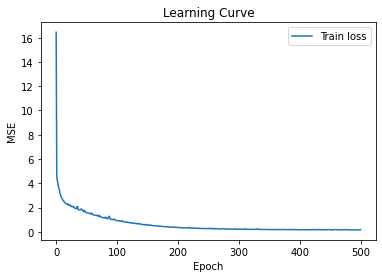

In [168]:
plt.plot(epoch_losses, label='Train loss')
plt.title("Learning Curve")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Finally, we can make predictions simply by passing data to the `forward()` function.

In [169]:
y_hat, _, _ = forward(X, weights=weights, bias=bias)
y_hat

array([[3.4438196 ],
       [3.39941493],
       [3.39051256],
       [3.13830421],
       [3.30190806],
       [3.35099988],
       [3.19593143],
       [3.25598872],
       [2.95642252],
       [2.95735068],
       [3.12238783],
       [3.05592309],
       [3.21350747],
       [3.13888044],
       [3.15067387],
       [2.99077946],
       [2.97243141],
       [2.99663331],
       [3.04074303],
       [2.62318184],
       [2.84362717],
       [2.977201  ],
       [2.84407245],
       [2.90969515],
       [2.82407862],
       [2.88258666],
       [2.94816922],
       [2.78794219],
       [2.74519444],
       [2.64792441],
       [2.26018301],
       [2.6860188 ],
       [2.71918225],
       [2.58096881],
       [2.51640161],
       [2.69444582],
       [2.64324097],
       [2.59001536],
       [2.64628725],
       [2.6278341 ],
       [2.48382782],
       [2.24820533],
       [2.59104389],
       [2.56344294],
       [2.04013298],
       [2.55708037],
       [2.50625531],
       [2.556

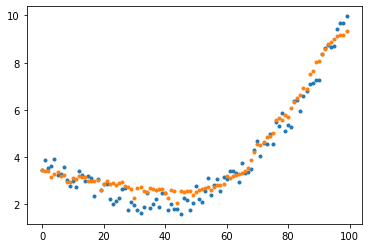

In [170]:
plt.plot(y, '.')
plt.plot(y_hat, '.')